In [72]:
!pip install yfinance

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})

import warnings
warnings.filterwarnings('ignore')

In [183]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Tech Stocks (using NSE and BSE codes)
tech_list = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each stock
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start, end)

# Create company list and names
company_list = [stock_data[stock] for stock in tech_list]
company_name = ["HDFC Bank Limited", "ICICI Bank Limited", "Axis Bank Limited", "Kotak Mahindra Bank Limited"]

# Add "company_name" column to each stock DataFrame
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-07-24  1678.500000  1684.650024  1670.099976  1678.400024  1655.789429   
2023-07-25  1684.650024  1699.000000  1678.400024  1696.599976  1673.744263   
2023-07-26  1699.599976  1699.599976  1688.000000  1690.699951  1667.923706   
2023-07-27  1699.900024  1703.000000  1667.449951  1673.150024  1650.610229   
2023-07-28  1661.500000  1668.900024  1641.099976  1643.500000  1621.359619   
2023-07-31  1650.050049  1656.800049  1638.699951  1651.199951  1628.955811   
2023-08-01  1654.449951  1667.449951  1650.000000  1662.250000  1639.857056   
2023-08-02  1642.000000  1651.500000  1633.150024  1640.500000  1618.400024   
2023-08-03  1640.000000  1651.349976  1623.000000  1628.650024  1606.709717   
2023-08-04  1635.150024  1656.500000  1629.250000  1652.199951  1629.942383   

              Volume       company_name  
Date                                     
2023-07-24  16089722  HDFC Bank Limited  
2023-07-25  27996298  HDFC Bank Limited  
2023-07-26  12397179  HDFC Bank Limited  
2023-07-27  29870651  HDFC Bank Limited  
2023-07-28  20507842  HDFC Bank Limited  
2023-07-31  17282503  HDFC Bank Limited  
2023-08-01  17697094  HDFC Bank Limited  
2023-08-02  14058161  HDFC Bank Limited  
2023-08-03  28836973  HDFC Bank Limited  
2023-08-04  18694152  HDFC Bank Limited

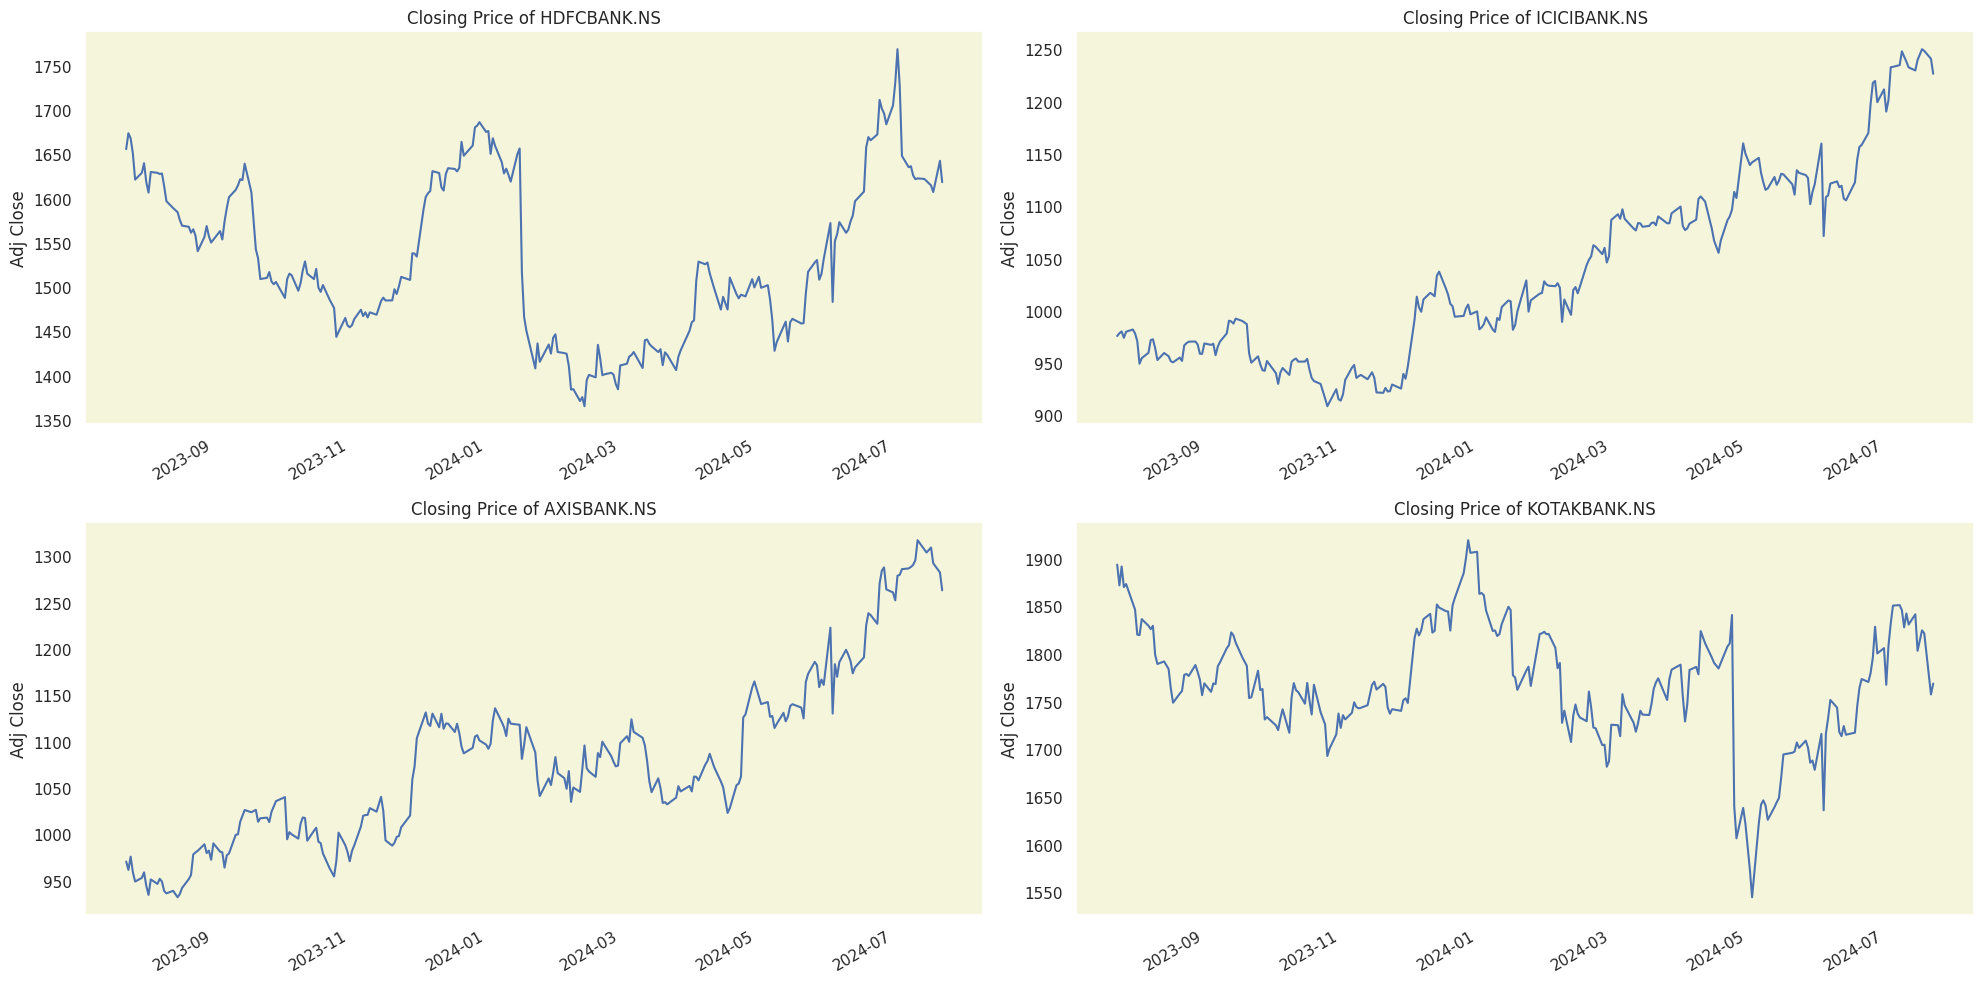

In [75]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

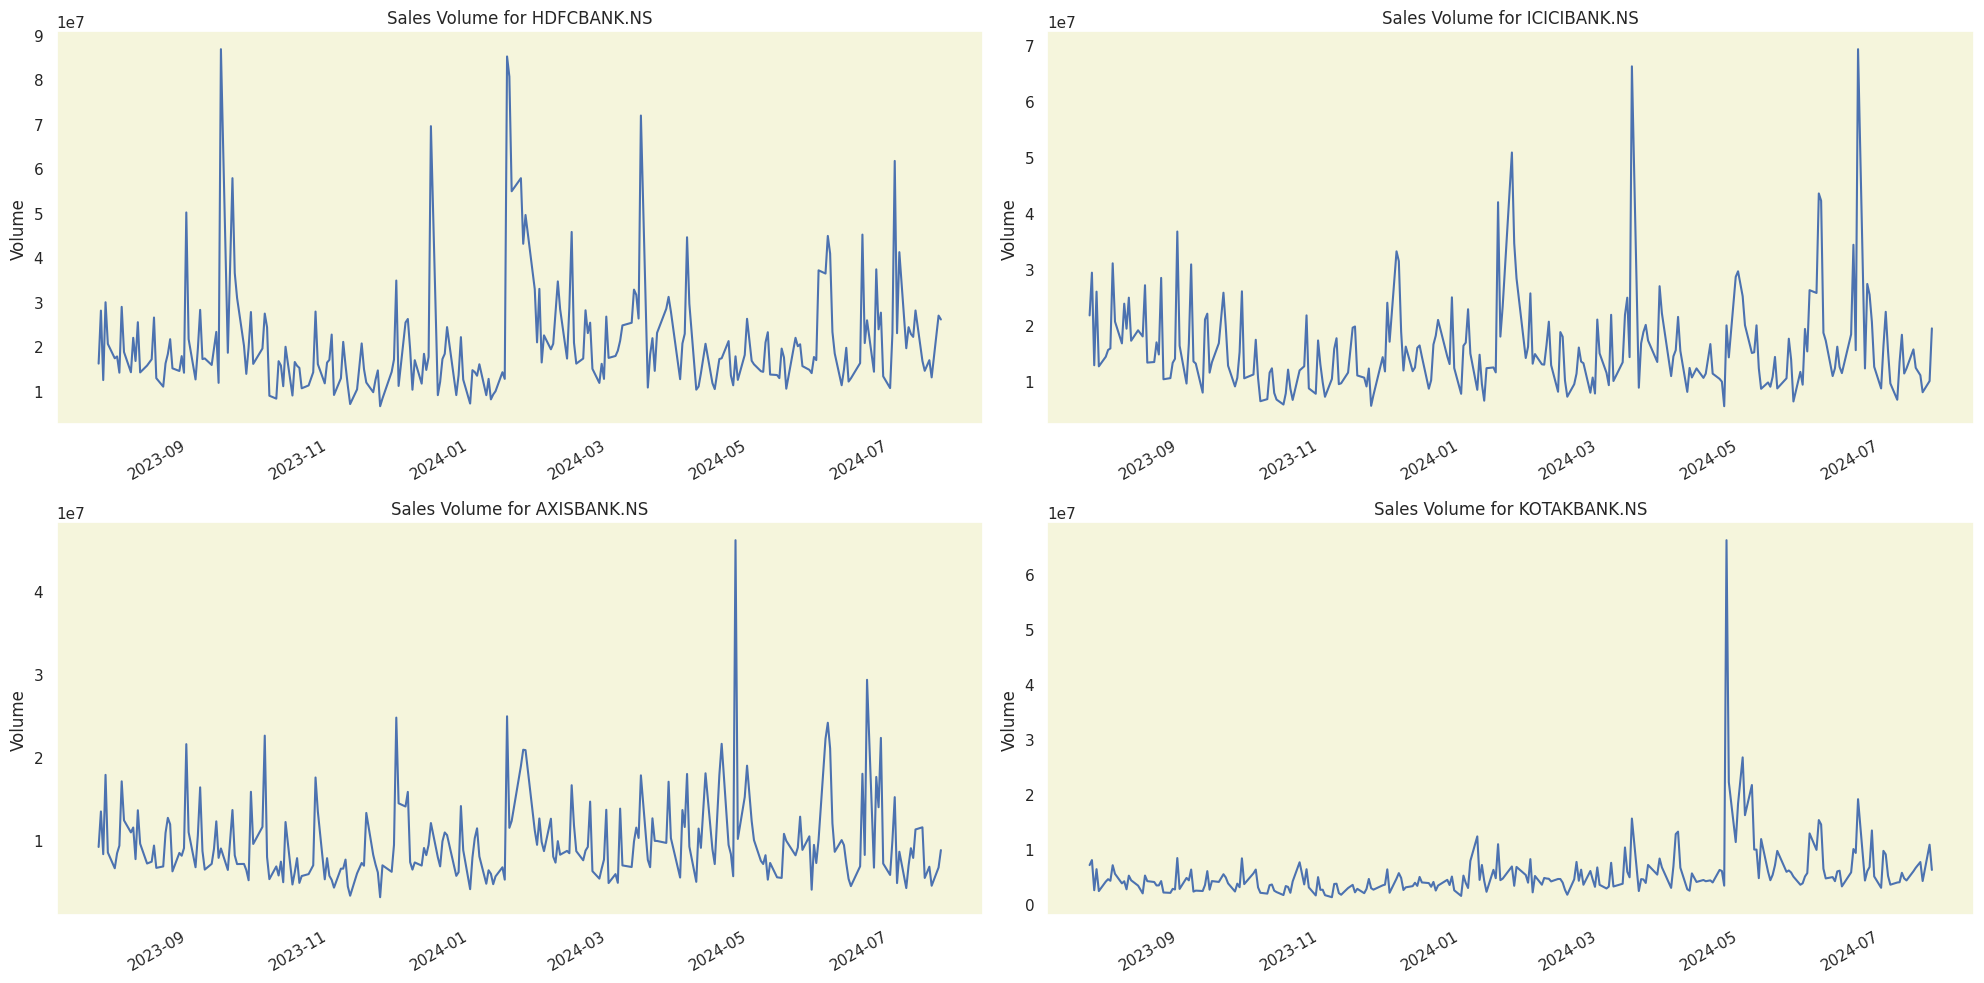

In [76]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

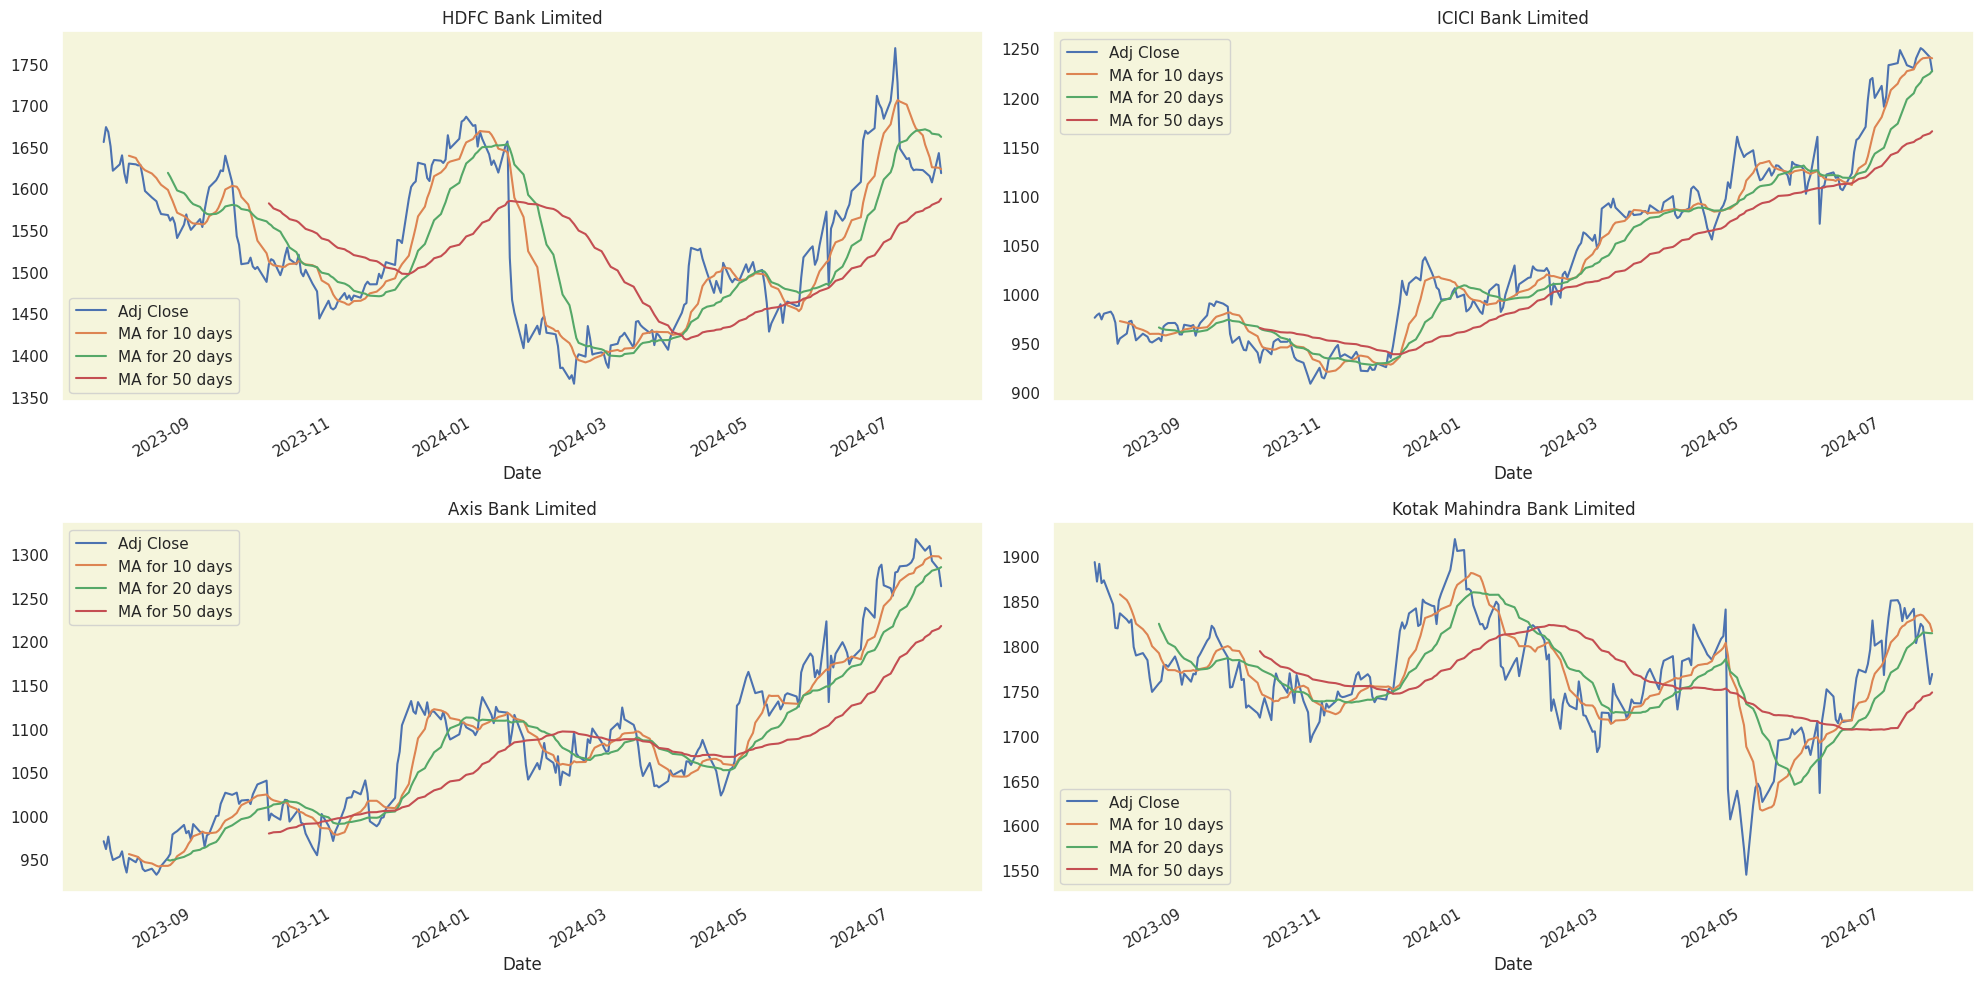

In [77]:
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

for i, (company, name) in enumerate(zip(company_list, company_name)):
    row = i // 2
    col = i % 2
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[row, col])
    axes[row, col].set_title(name)

fig.tight_layout()
plt.show()

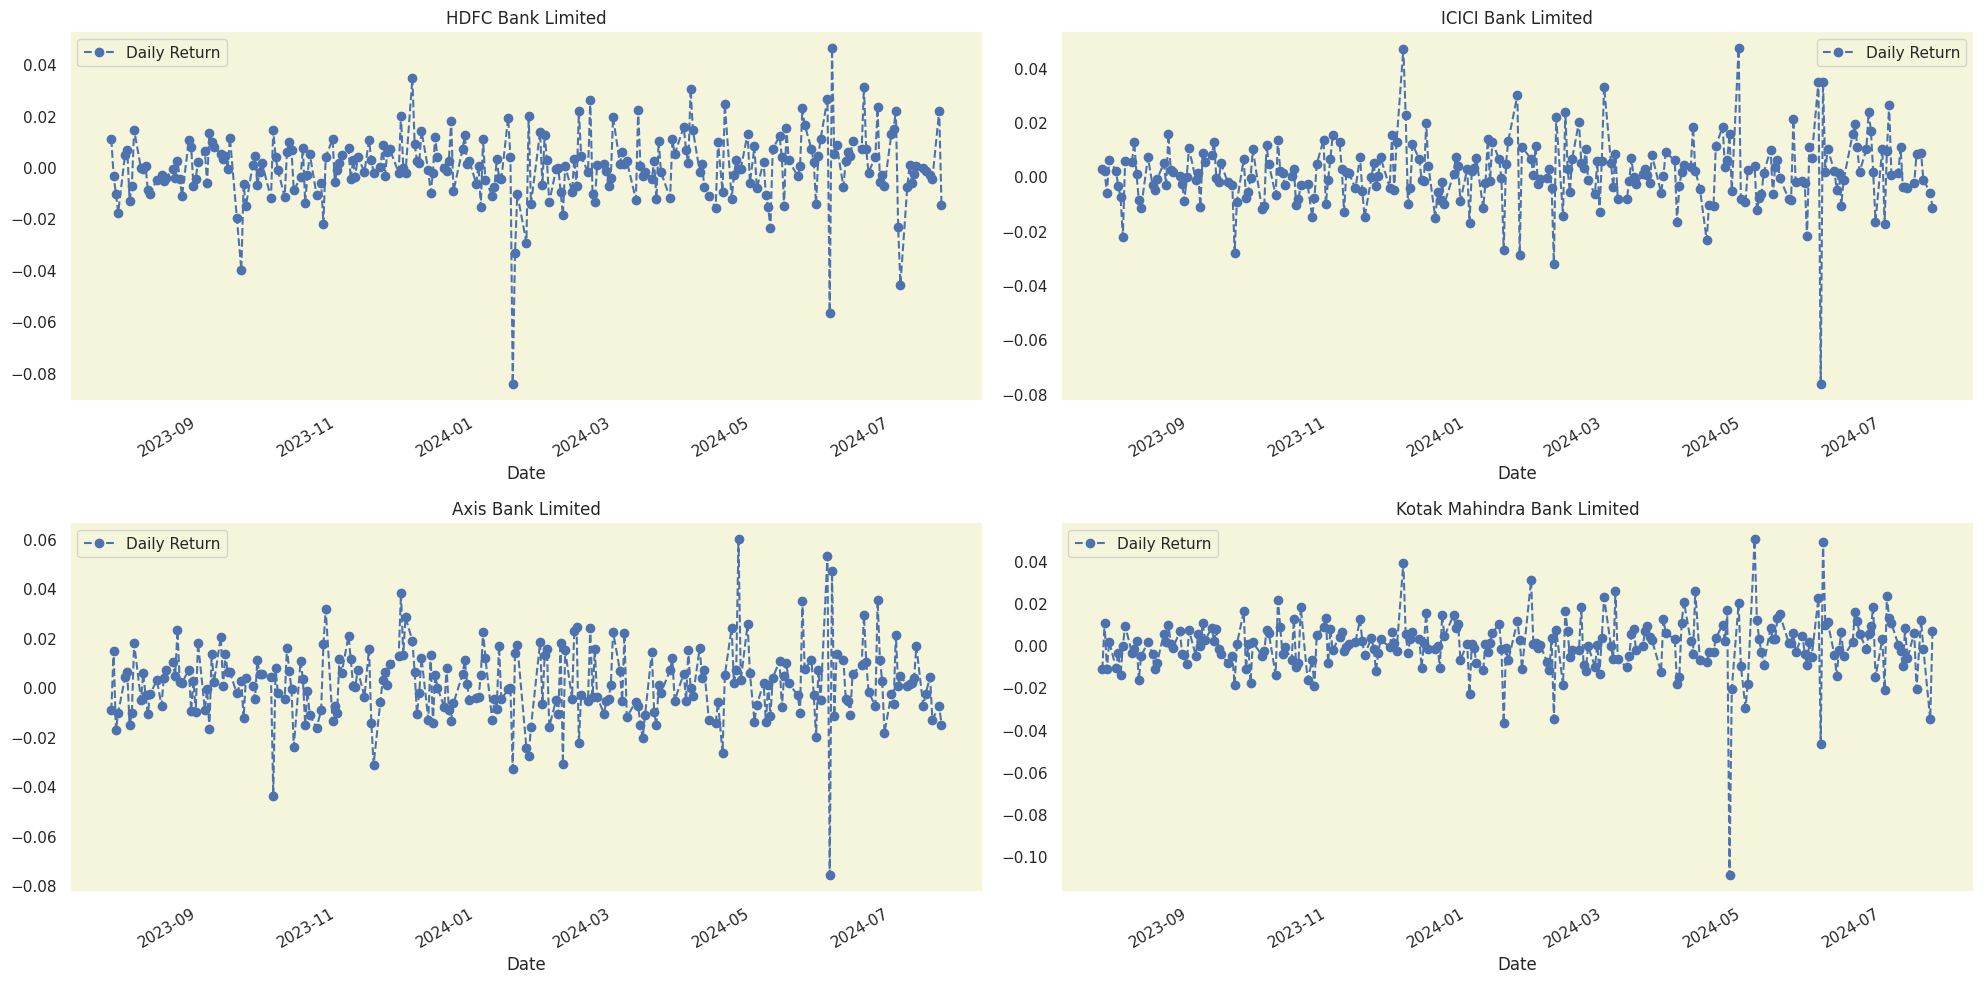

In [78]:
import matplotlib.pyplot as plt

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

for i, (company, name) in enumerate(zip(company_list, company_name)):
    row = i // 2
    col = i % 2
    company['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(name)

fig.tight_layout()
plt.show()

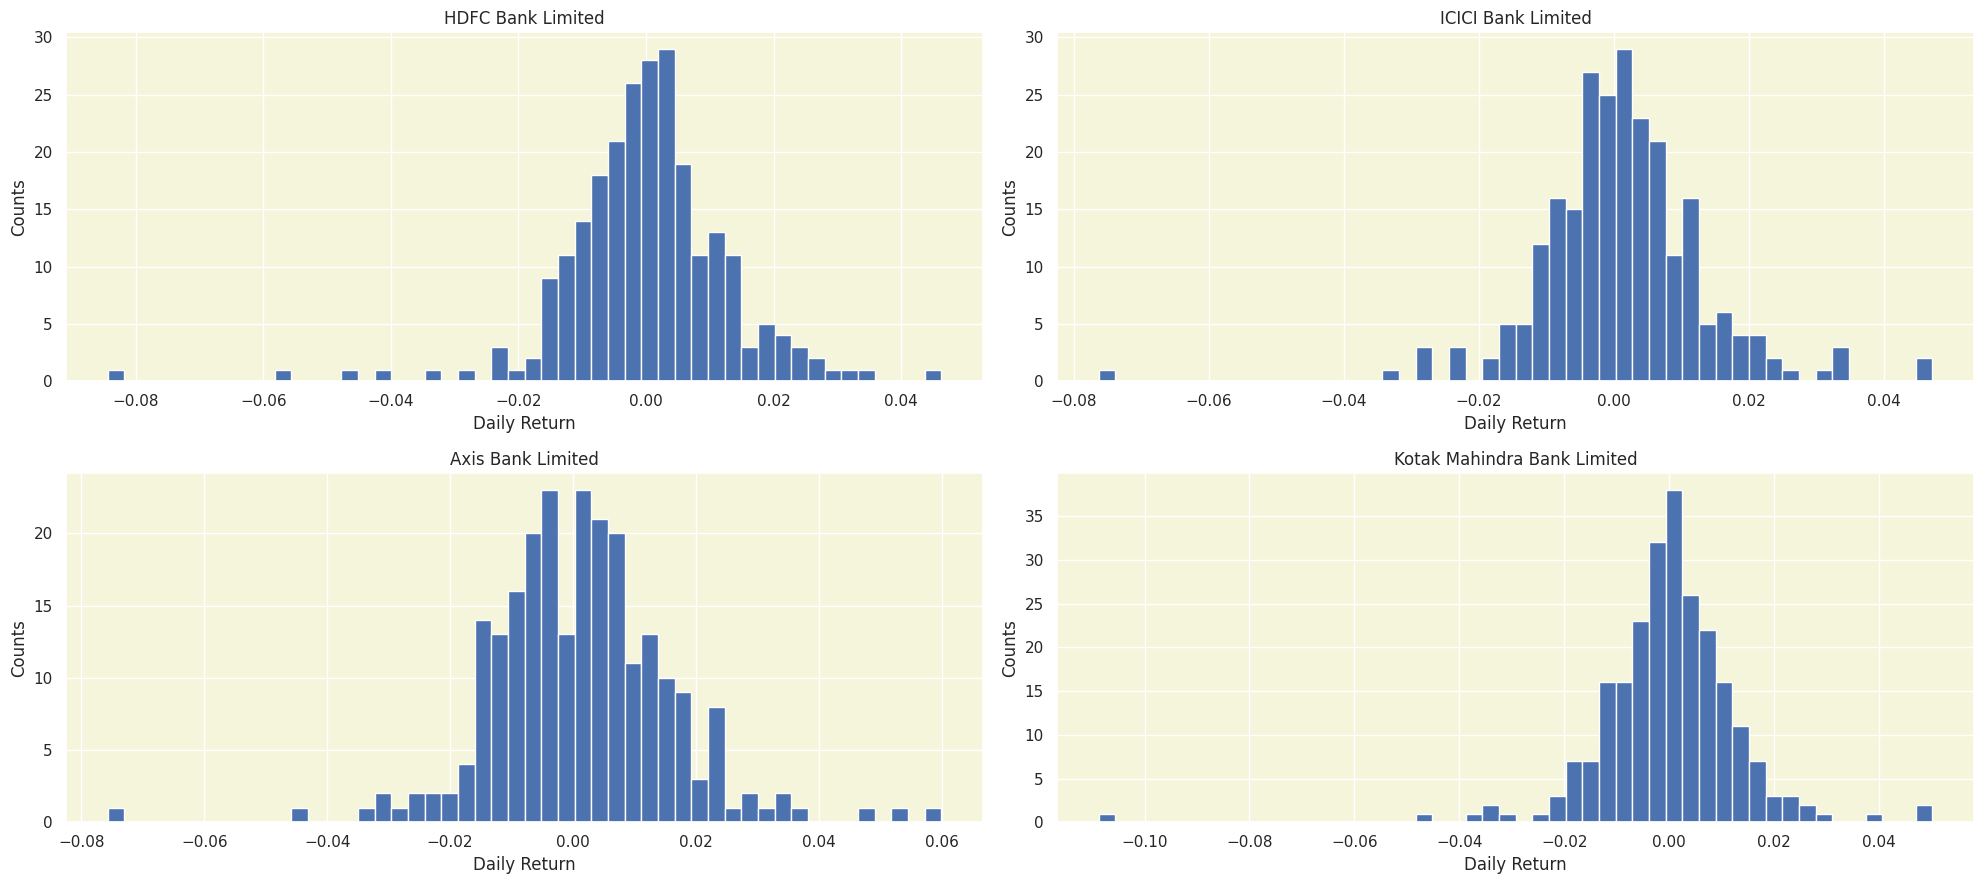

In [79]:
plt.figure(figsize=(20, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [80]:
import pandas_datareader as pdr
import pandas_datareader.data as pdr
import datetime
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker      AXISBANK.NS  HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS
Date                                                            
2023-07-24          NaN          NaN           NaN           NaN
2023-07-25    -0.009264     0.010844      0.002722     -0.011464
2023-07-26     0.014857    -0.003478      0.001759      0.010557
2023-07-27    -0.017301    -0.010380     -0.006222     -0.011370
2023-07-28    -0.010366    -0.017721      0.006009      0.001654

Index(['HDFC Bank Limited', 'ICICI Bank Limited', 'Axis Bank Limited',
       'Kotak Mahindra Bank Limited'],
      dtype='object')


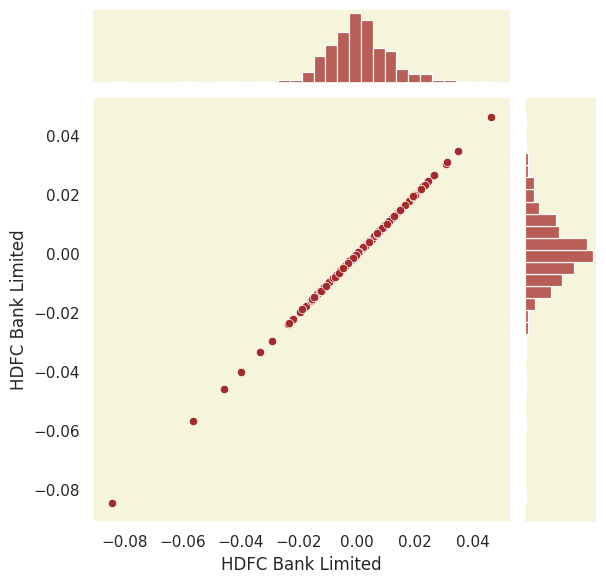

In [81]:
import seaborn as sns

# Create a DataFrame with daily returns of all companies
tech_rets = pd.DataFrame()
for company, name in zip(company_list, company_name):
    tech_rets[name] = company['Daily Return']

# Print column names to verify
print(tech_rets.columns)

# Use the first company name for the jointplot
first_company = company_name[0]
sns.jointplot(x=first_company, y=first_company, data=tech_rets, kind='scatter', color='Brown')
plt.show()

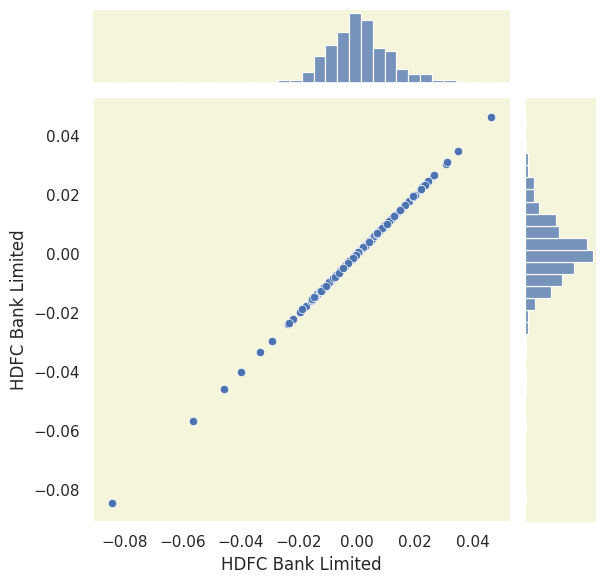

In [82]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x=first_company, y=first_company, data=tech_rets, kind='scatter');

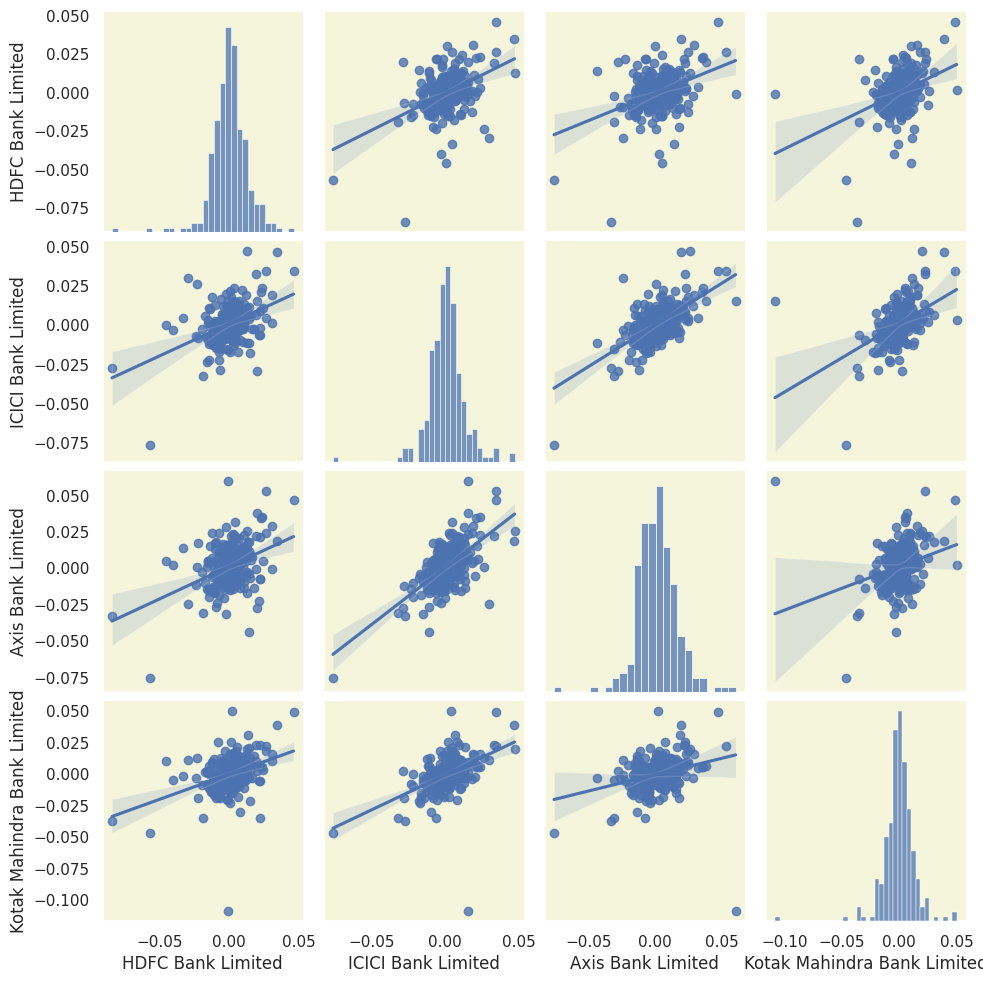

In [83]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg');

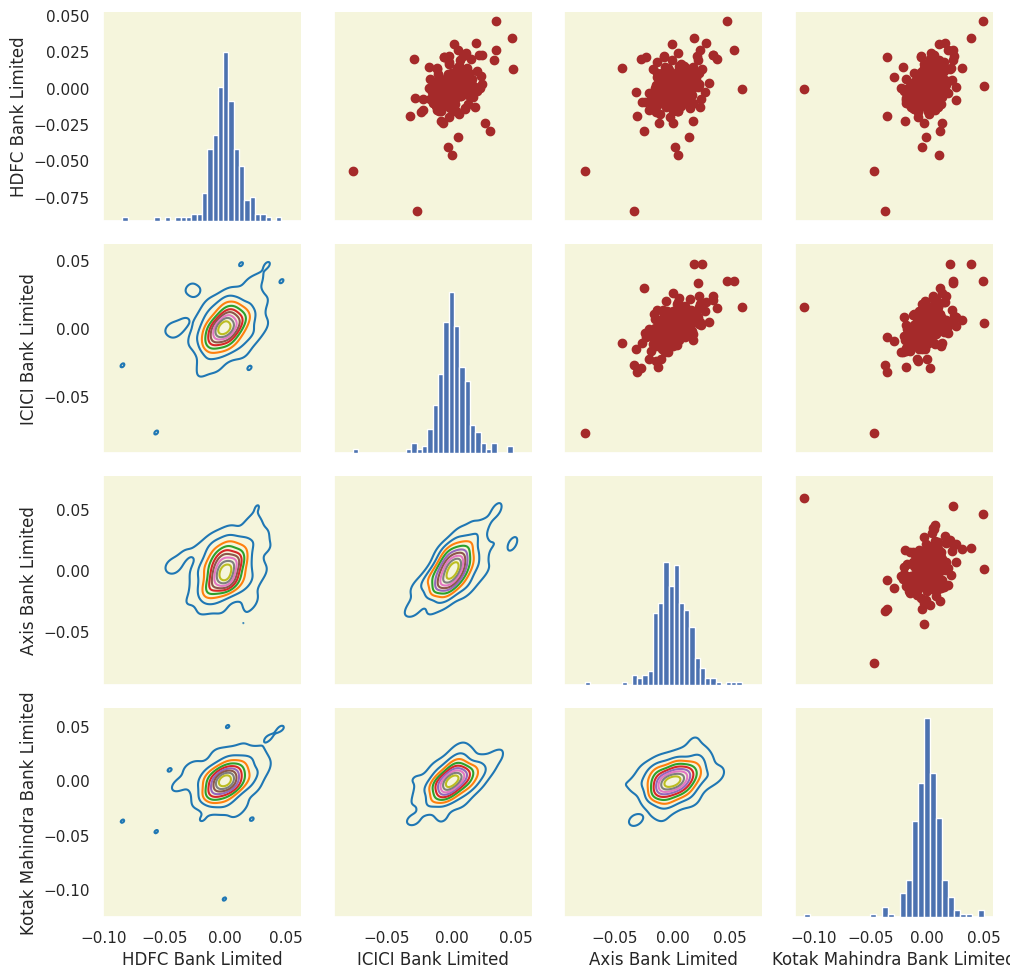

In [84]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='Brown')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='tab10')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30);

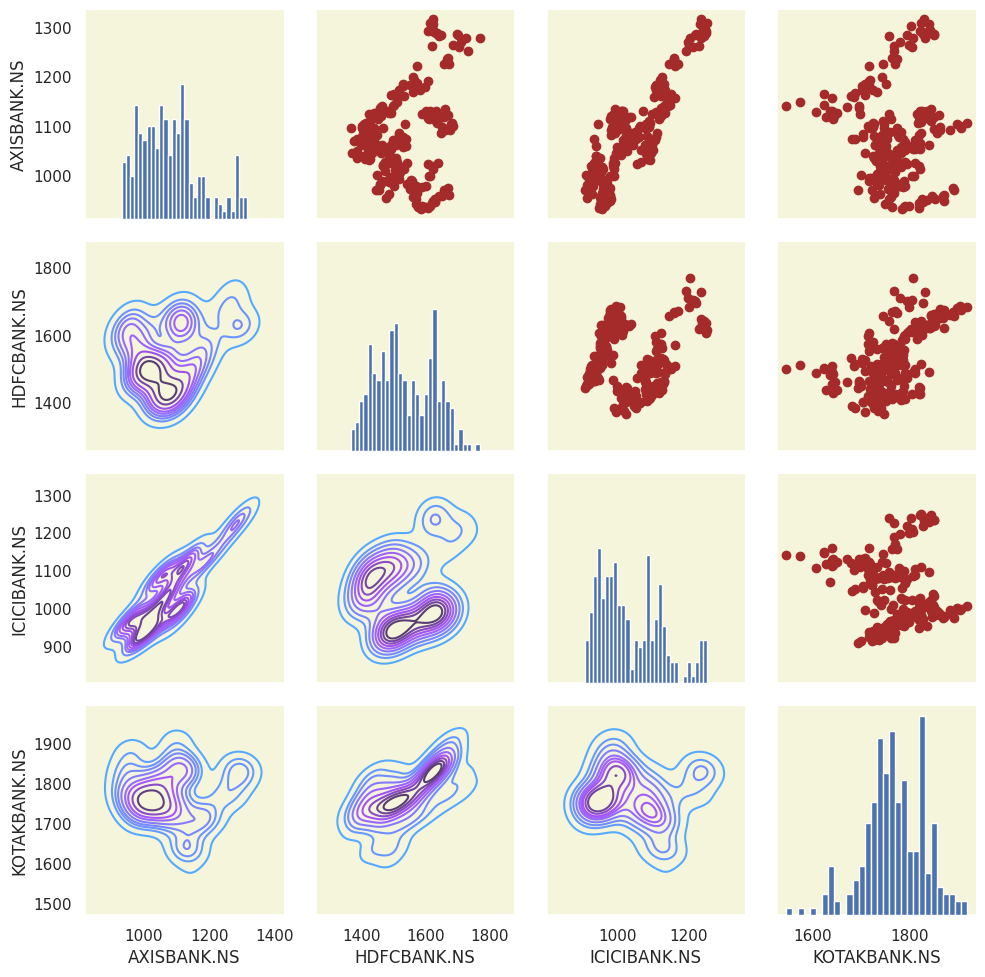

In [85]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='Brown')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

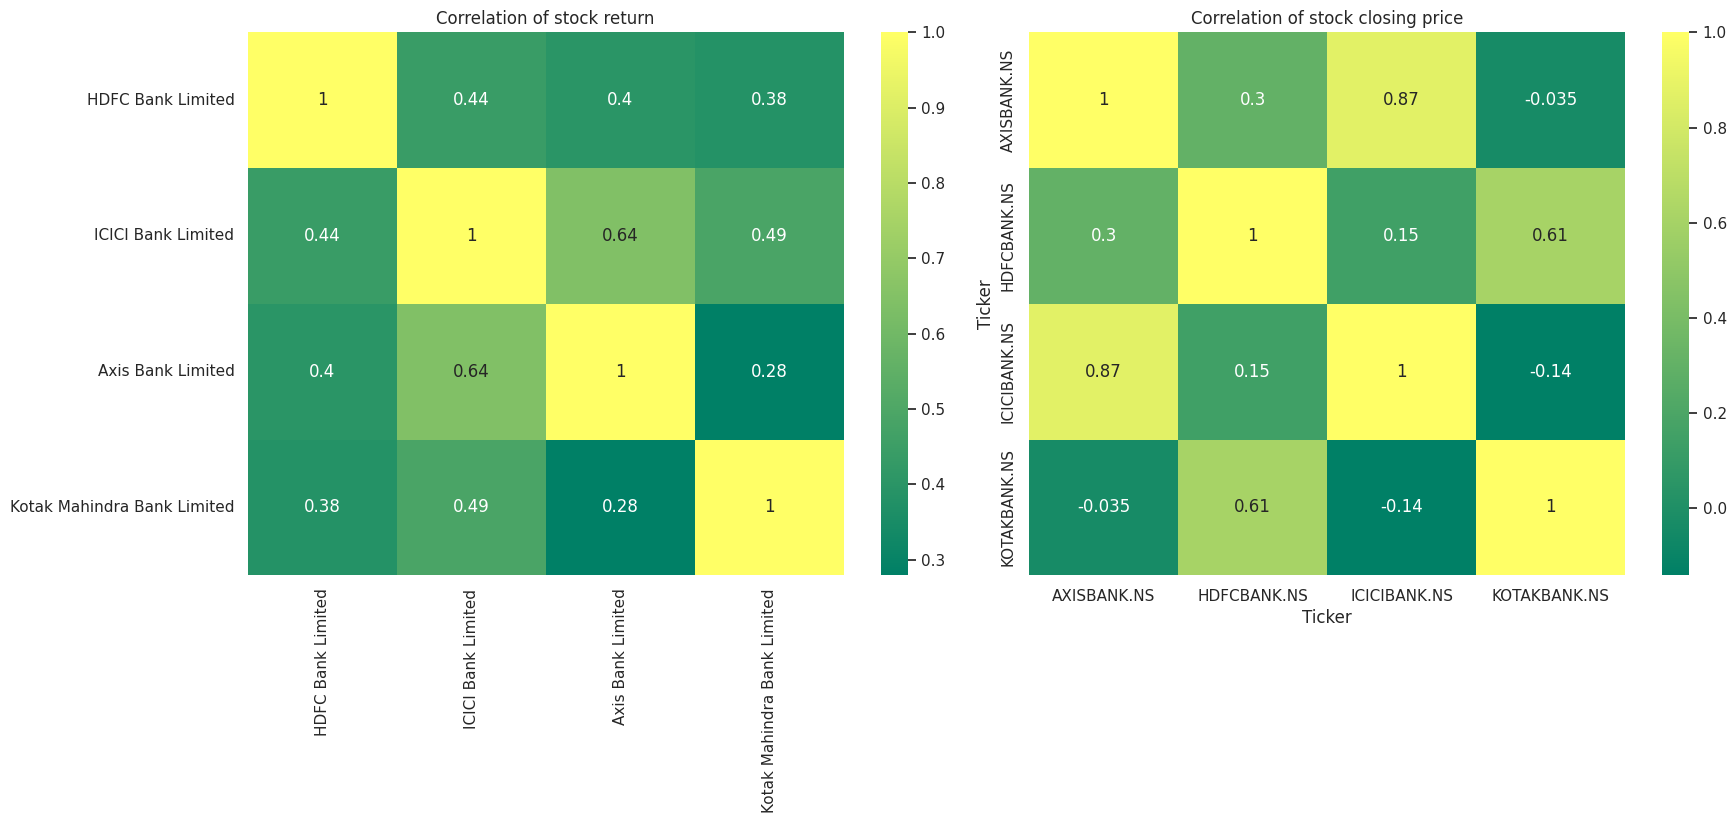

In [86]:
plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
plt.tight_layout()

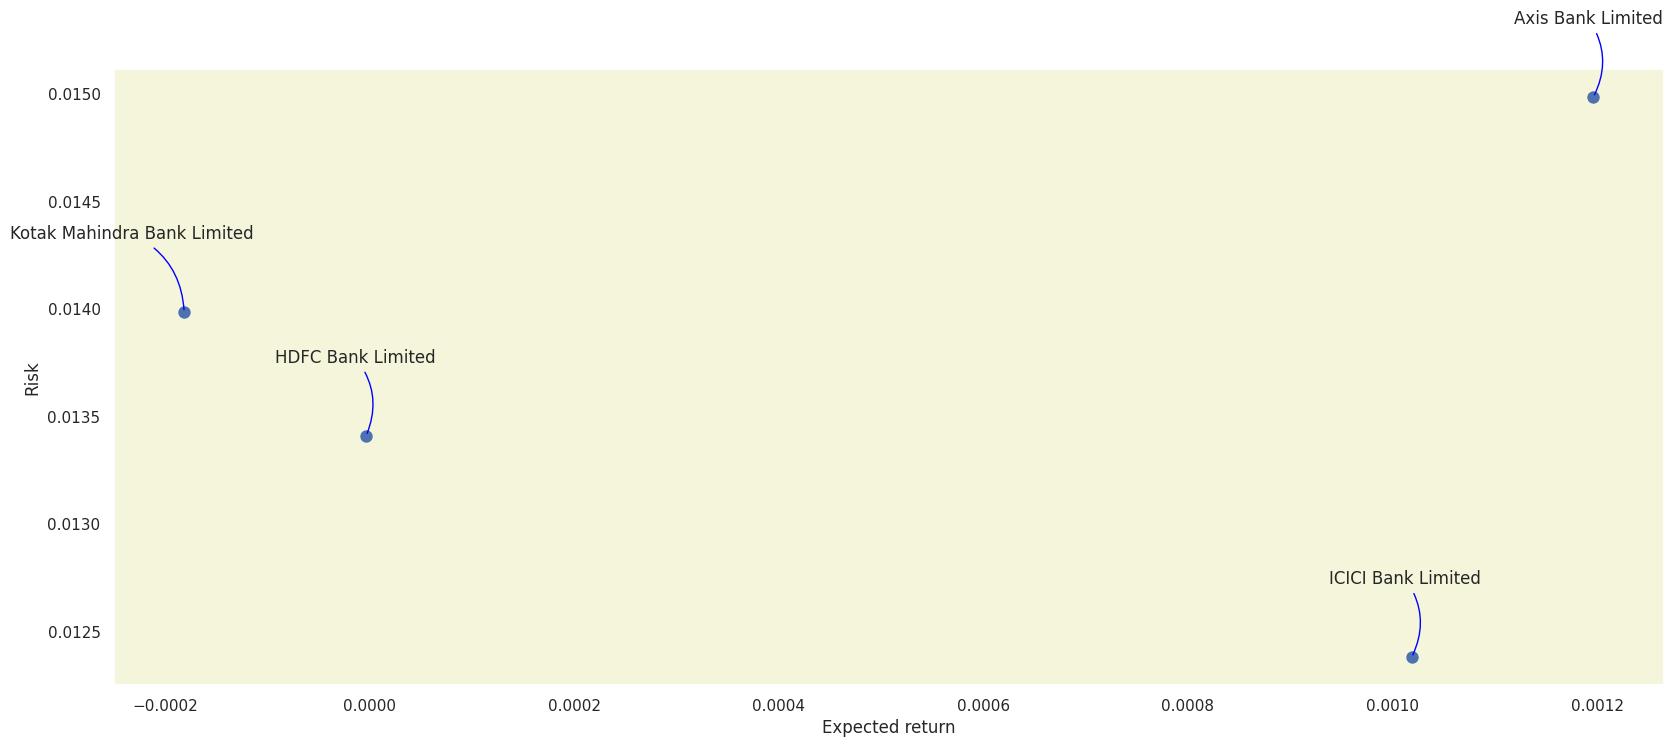

In [87]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(20, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# ***HDFC BANK LIMITED***

In [157]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

# Override Yahoo Finance with yfinance
yf.pdr_override()

# Get the stock quote for Adani Power
df = pdr.get_data_yahoo('HDFCBANK.NS', start='2010-01-01', end=datetime.now())

# Show the first few rows of the data
df.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  170.000000  172.850006  169.255005  170.570007  151.915115   
2010-01-05  171.000000  172.500000  170.500000  170.720001  152.048706   
2010-01-06  171.399994  172.000000  168.809998  170.835007  152.151138   
2010-01-07  176.839996  176.839996  170.160004  171.279999  152.547455   
2010-01-08  171.199997  172.339996  170.100006  171.505005  152.747849   

             Volume  
Date                 
2010-01-04  3050490  
2010-01-05  8386600  
2010-01-06  6639840  
2010-01-07  6123980  
2010-01-08  7085900

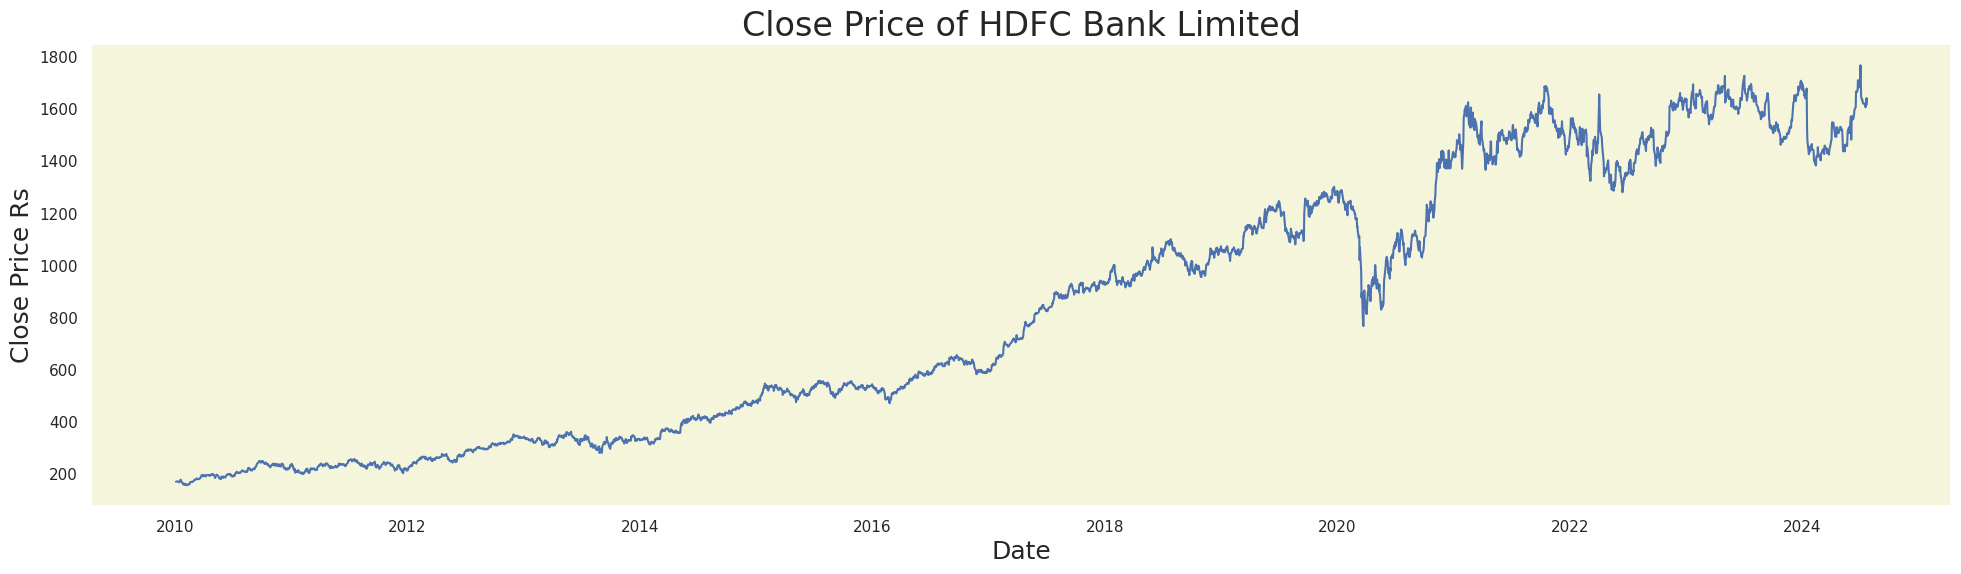

In [158]:
plt.figure(figsize=(24,6))
plt.title('Close Price of HDFC Bank Limited',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.show()

In [159]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3411

In [160]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00857988],
       [0.00867294],
       [0.00874429],
       ...,
       [0.89990138],
       [0.92176984],
       [0.9067876 ]])

In [161]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00857988, 0.00867294, 0.00874429, 0.00902035, 0.00915994,
       0.00873188, 0.00792848, 0.00756245, 0.00722125, 0.00786333,
       0.0123611 , 0.01313969, 0.01170661, 0.008949  , 0.00680559,
       0.00554001, 0.00184874, 0.00160368, 0.00394873, 0.00200694,
       0.00072585, 0.00343381, 0.00306158, 0.00036913, 0.        ,
       0.00026365, 0.00162229, 0.00189837, 0.00287857, 0.00241949,
       0.00549348, 0.00721814, 0.00784783, 0.00801533, 0.0082883 ,
       0.00825728, 0.00767102, 0.00852404, 0.01101488, 0.01298149,
       0.01326067, 0.01343747, 0.01344988, 0.01512491, 0.01532654,
       0.01610202, 0.01450763, 0.01520866, 0.01471546, 0.01490778,
       0.01448591, 0.01566154, 0.0167317 , 0.01964129, 0.02225621,
       0.02382577, 0.02466949, 0.02105886, 0.02271219, 0.0230689 ])]
[0.023642759312250253]

[array([0.00857988, 0.00867294, 0.00874429, 0.00902035, 0.00915994,
       0.00873188, 0.00792848, 0.00756245, 0.00722125, 0.00786333,
       0.0123611 , 0.01313969, 0.0

In [162]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3351/3351 [==============================] - 196s 57ms/step - loss: 0.0011


In [163]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 36ms/step


40.072632591524716

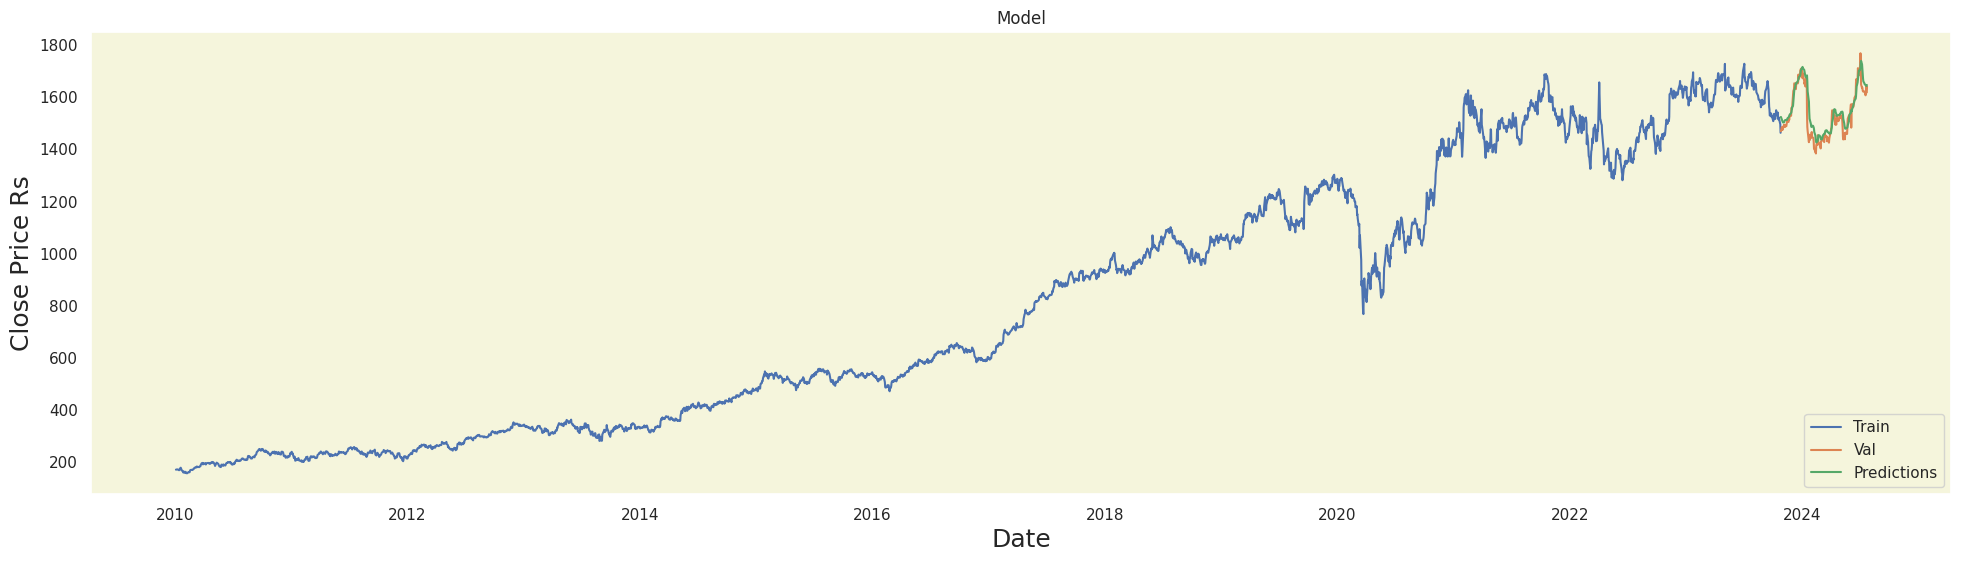

In [164]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [165]:
valid

Close  Predictions
Date                                
2023-10-27  1469.150024  1524.201660
2023-10-30  1485.099976  1513.547119
2023-10-31  1476.500000  1508.972046
2023-11-01  1474.500000  1505.905151
2023-11-02  1476.750000  1503.778809
...                 ...          ...
2024-07-16  1619.750000  1650.279297
2024-07-18  1614.800049  1648.113647
2024-07-19  1607.300049  1646.054688
2024-07-22  1642.550049  1642.911499
2024-07-23  1618.400024  1647.205322

[179 rows x 2 columns]

In [166]:
valid['Error'] = valid['Predictions'] - valid['Close']
valid

Close  Predictions      Error
Date                                           
2023-10-27  1469.150024  1524.201660  55.051636
2023-10-30  1485.099976  1513.547119  28.447144
2023-10-31  1476.500000  1508.972046  32.472046
2023-11-01  1474.500000  1505.905151  31.405151
2023-11-02  1476.750000  1503.778809  27.028809
...                 ...          ...        ...
2024-07-16  1619.750000  1650.279297  30.529297
2024-07-18  1614.800049  1648.113647  33.313599
2024-07-19  1607.300049  1646.054688  38.754639
2024-07-22  1642.550049  1642.911499   0.361450
2024-07-23  1618.400024  1647.205322  28.805298

[179 rows x 3 columns]

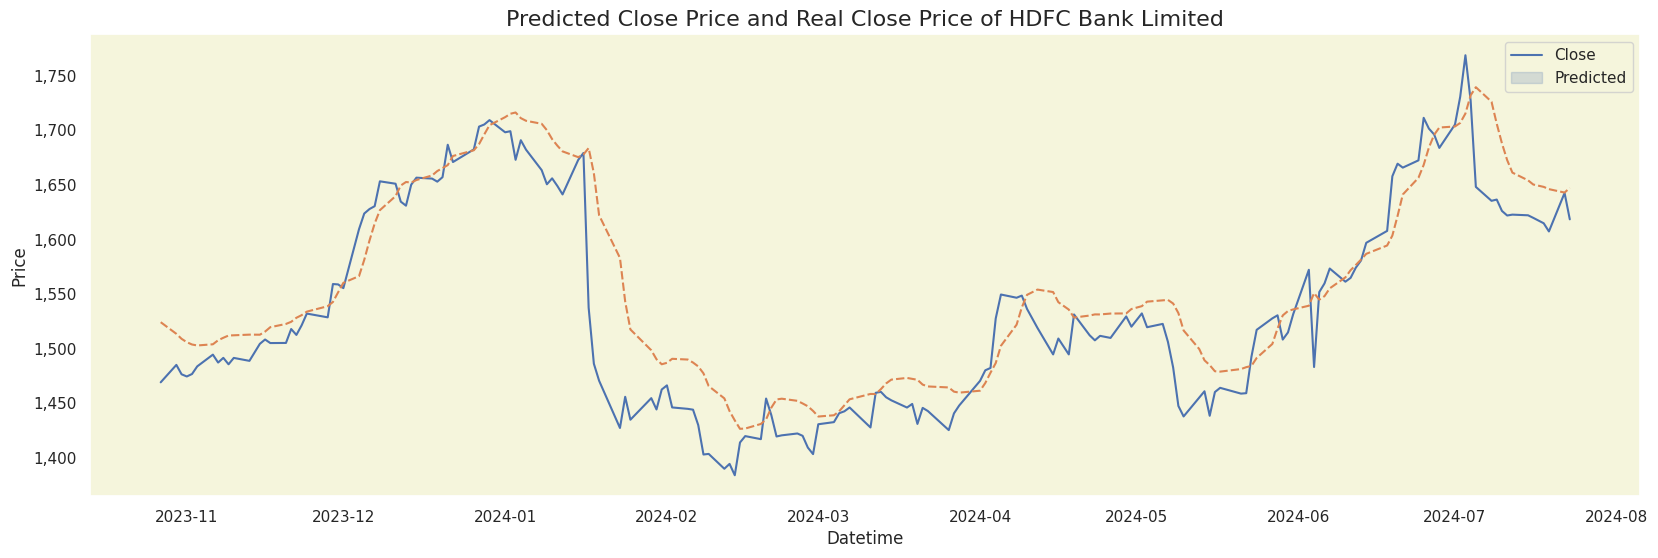

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

from matplotlib import ticker
fig, ax = plt.subplots()
sns.lineplot(data=valid[['Close', 'Predictions']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend(labels=['Close', 'Predicted'])
plt.title('Predicted Close Price and Real Close Price of HDFC Bank Limited', fontsize=16)
plt.show()

In [102]:
#Updated Code
import numpy as np
from tensorflow import keras  # Using tensorflow.keras for consistency
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming your data is already preprocessed and scaled (if necessary)

# Define hyperparameters (adjust these based on your data and experiment)
epochs = 100
batch_size = 32
learning_rate = 0.001

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64))  # Remove return_sequences for final LSTM layer
model.add(Dense(25, activation='relu'))  # Add activation layer for hidden layer
model.add(Dense(1))  # Output layer for single prediction

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train the model with validation data to monitor overfitting

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/100
105/105 [==============================] - 22s 139ms/step - loss: 0.0074
Epoch 2/100
105/105 [==============================] - 15s 146ms/step - loss: 4.0239e-04
Epoch 3/100
105/105 [==============================] - 16s 147ms/step - loss: 4.0108e-04
Epoch 4/100
105/105 [==============================] - 16s 156ms/step - loss: 3.7805e-04
Epoch 5/100
105/105 [==============================] - 18s 174ms/step - loss: 3.7150e-04
Epoch 6/100
105/105 [==============================] - 21s 199ms/step - loss: 3.9055e-04
Epoch 7/100
105/105 [==============================] - 14s 132ms/step - loss: 3.4904e-04
Epoch 8/100
105/105 [==============================] - 15s 143ms/step - loss: 3.4436e-04
Epoch 9/100
105/105 [==============================] - 12s 113ms/step - loss: 3.0260e-04
Epoch 10/100
105/105 [==============================] - 13s 120ms/step - loss: 2.7821e-04
Epoch 11/100
105/105 [==============================] - 13s 120ms/step - loss: 2.9027e-04
Epoch 12/100
105/105 [=

In [103]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 33ms/step


24.05547452719799

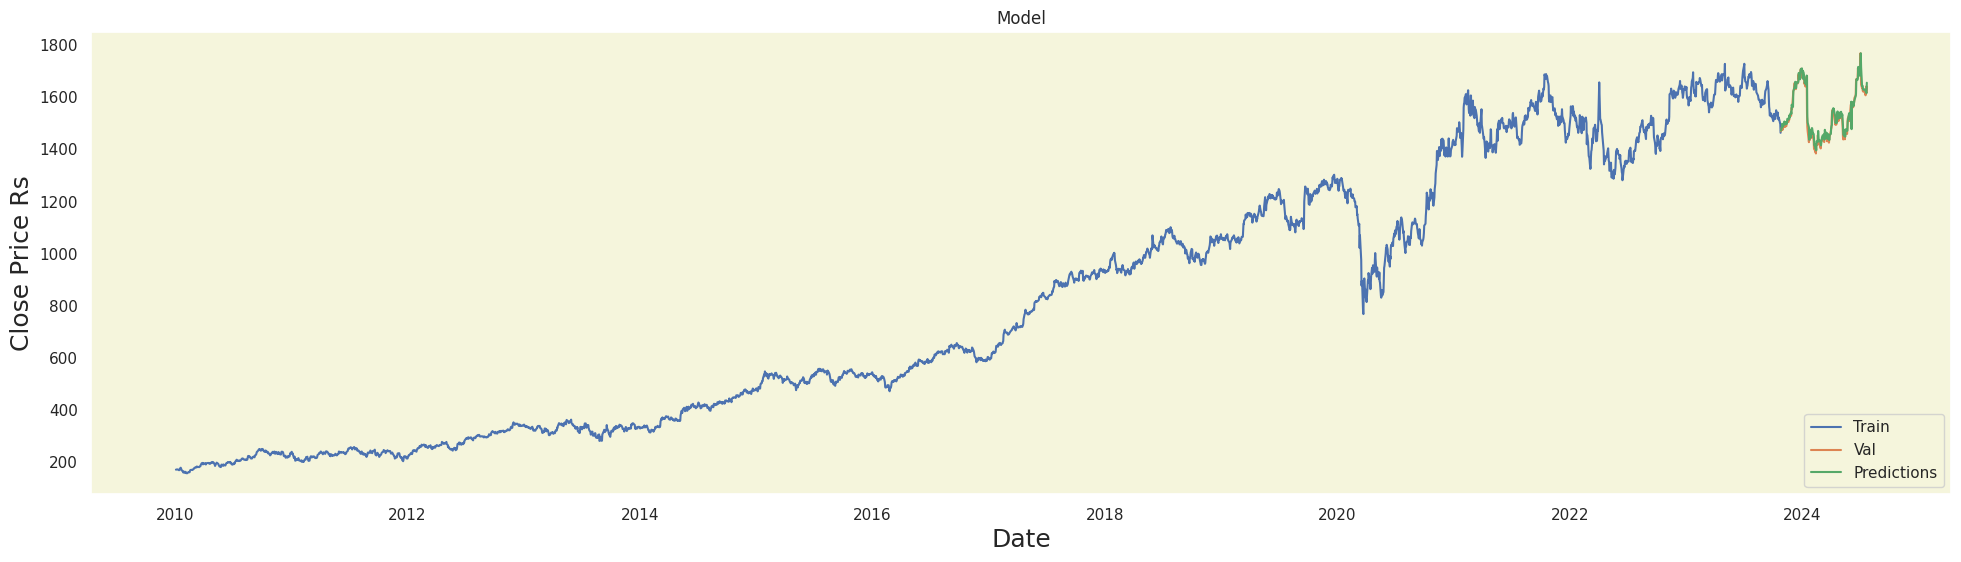

In [104]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [105]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                                
2023-10-27  1469.150024  1471.592773
2023-10-30  1485.099976  1483.753540
2023-10-31  1476.500000  1497.982910
2023-11-01  1474.500000  1486.254761
2023-11-02  1476.750000  1486.917969
...                 ...          ...
2024-07-16  1619.750000  1629.958008
2024-07-18  1614.800049  1627.938965
2024-07-19  1607.300049  1623.051514
2024-07-22  1642.550049  1615.610718
2024-07-23  1618.400024  1655.498169

[179 rows x 2 columns]

In [106]:
valid['Error'] = valid['Predictions'] - valid['Close']
valid

Close  Predictions      Error
Date                                           
2023-10-27  1469.150024  1471.592773   2.442749
2023-10-30  1485.099976  1483.753540  -1.346436
2023-10-31  1476.500000  1497.982910  21.482910
2023-11-01  1474.500000  1486.254761  11.754761
2023-11-02  1476.750000  1486.917969  10.167969
...                 ...          ...        ...
2024-07-16  1619.750000  1629.958008  10.208008
2024-07-18  1614.800049  1627.938965  13.138916
2024-07-19  1607.300049  1623.051514  15.751465
2024-07-22  1642.550049  1615.610718 -26.939331
2024-07-23  1618.400024  1655.498169  37.098145

[179 rows x 3 columns]

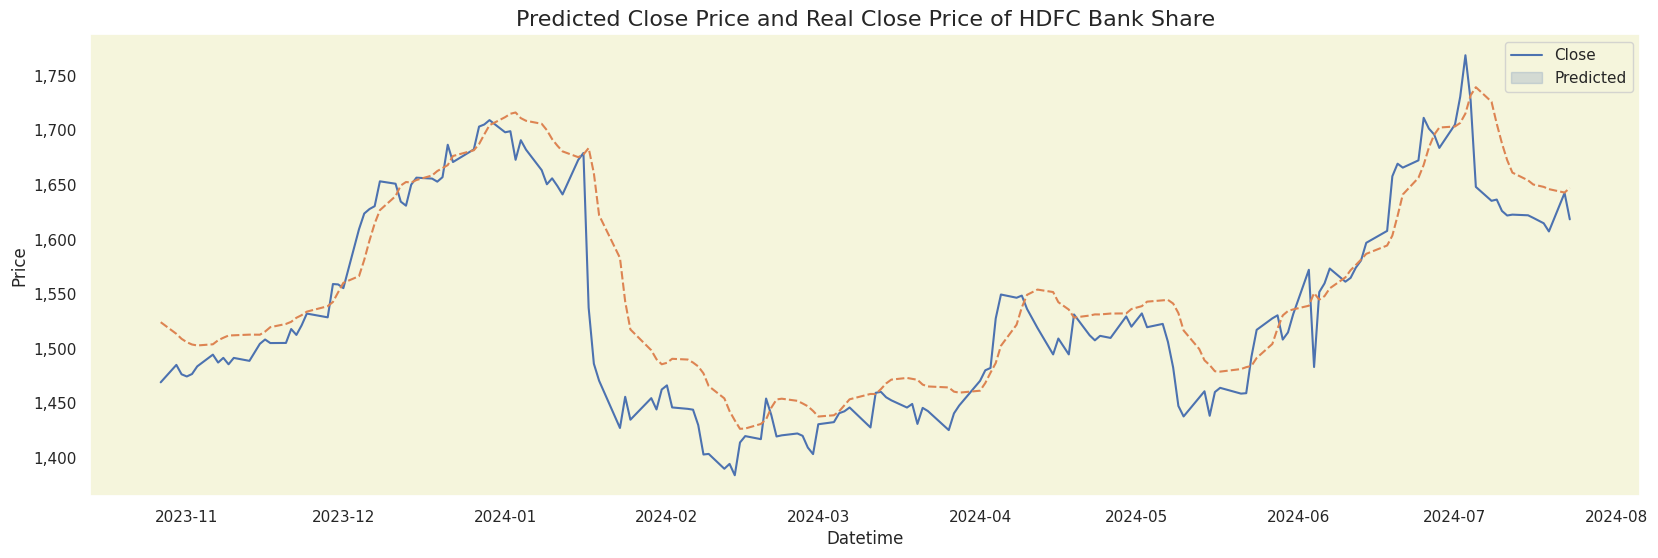

In [168]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

from matplotlib import ticker
fig, ax = plt.subplots()
sns.lineplot(data=valid[['Close', 'Predictions']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend(labels=['Close', 'Predicted'])
plt.title('Predicted Close Price and Real Close Price of HDFC Bank Share', fontsize=16)
plt.show()

#***ICICI BANK LIMITED***

In [109]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

# Override Yahoo Finance with yfinance
yf.pdr_override()

# Get the stock quote for Adani Power
df = pdr.get_data_yahoo('ICICIBANK.NS', start='2010-01-01', end=datetime.now())

# Show the first few rows of the data
df.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  159.454544  160.909088  159.090912  159.945450  133.344131   
2010-01-05  161.454544  163.590912  160.272720  161.463638  134.609833   
2010-01-06  162.727264  164.972733  161.836365  162.699997  135.640564   
2010-01-07  163.045456  163.045456  159.363632  161.163635  134.359726   
2010-01-08  161.654541  161.818176  158.363632  158.899994  132.472565   

              Volume  
Date                  
2010-01-04   9162186  
2010-01-05  14659997  
2010-01-06  20410054  
2010-01-07  10852286  
2010-01-08  20580934

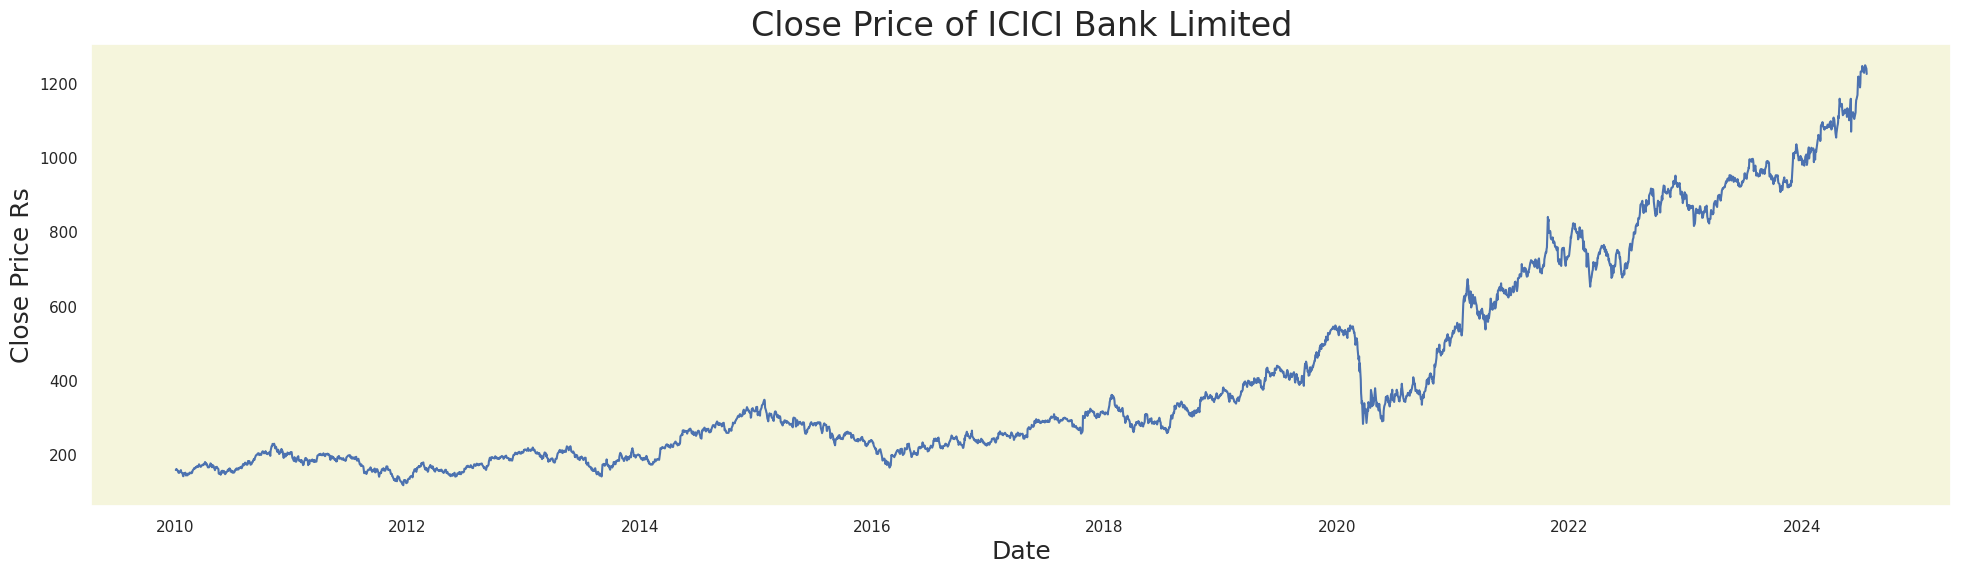

In [115]:
plt.figure(figsize=(24,6))
plt.title('Close Price of ICICI Bank Limited',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.show()

In [116]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3411

In [117]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03636363],
       [0.03770538],
       [0.03879805],
       ...,
       [0.99854174],
       [0.99191337],
       [0.97918688]])

In [118]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03636363, 0.03770538, 0.03879805, 0.03744024, 0.03543967,
       0.03470855, 0.03042621, 0.03008878, 0.0292291 , 0.03037802,
       0.03373639, 0.03408186, 0.03608243, 0.03202506, 0.0300968 ,
       0.02850601, 0.02151608, 0.0216366 , 0.02843368, 0.02930944,
       0.02660988, 0.02989595, 0.02818462, 0.02325955, 0.0244165 ,
       0.02554935, 0.02352468, 0.02774273, 0.02634475, 0.02877113,
       0.03013698, 0.02999236, 0.0289479 , 0.02863455, 0.03122966,
       0.03016911, 0.03184831, 0.03515044, 0.03916763, 0.04096733,
       0.0393685 , 0.0399068 , 0.04344193, 0.04366689, 0.04248583,
       0.04458281, 0.0455148 , 0.04344193, 0.04452657, 0.04742698,
       0.04985337, 0.04871249, 0.04528984, 0.04372312, 0.04506487,
       0.04725825, 0.04807777, 0.04923472, 0.0480617 , 0.0480858 ])]
[0.053340287690802124]

[array([0.03636363, 0.03770538, 0.03879805, 0.03744024, 0.03543967,
       0.03470855, 0.03042621, 0.03008878, 0.0292291 , 0.03037802,
       0.03373639, 0.03408186, 0.0

In [119]:
import numpy as np
from tensorflow import keras  # Using tensorflow.keras for consistency
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming your data is already preprocessed and scaled (if necessary)

# Define hyperparameters (adjust these based on your data and experiment)
epochs = 100
batch_size = 32
learning_rate = 0.001

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64))  # Remove return_sequences for final LSTM layer
model.add(Dense(25, activation='relu'))  # Add activation layer for hidden layer
model.add(Dense(1))  # Output layer for single prediction

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train the model with validation data to monitor overfitting

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
105/105 [==============================] - 22s 157ms/step - loss: 0.0022
Epoch 2/100
105/105 [==============================] - 17s 162ms/step - loss: 2.6597e-04
Epoch 3/100
105/105 [==============================] - 17s 160ms/step - loss: 2.7863e-04
Epoch 4/100
105/105 [==============================] - 16s 152ms/step - loss: 2.1388e-04
Epoch 5/100
105/105 [==============================] - 17s 165ms/step - loss: 2.2225e-04
Epoch 6/100
105/105 [==============================] - 15s 146ms/step - loss: 2.0229e-04
Epoch 7/100
105/105 [==============================] - 13s 121ms/step - loss: 1.8227e-04
Epoch 8/100
105/105 [==============================] - 17s 161ms/step - loss: 1.8899e-04
Epoch 9/100
105/105 [==============================] - 15s 147ms/step - loss: 1.5717e-04
Epoch 10/100
105/105 [==============================] - 13s 125ms/step - loss: 1.4785e-04
Epoch 11/100
105/105 [==============================] - 15s 141ms/step - loss: 1.3687e-04
Epoch 12/100
105/105 [=

In [120]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 34ms/step


14.932635751863058

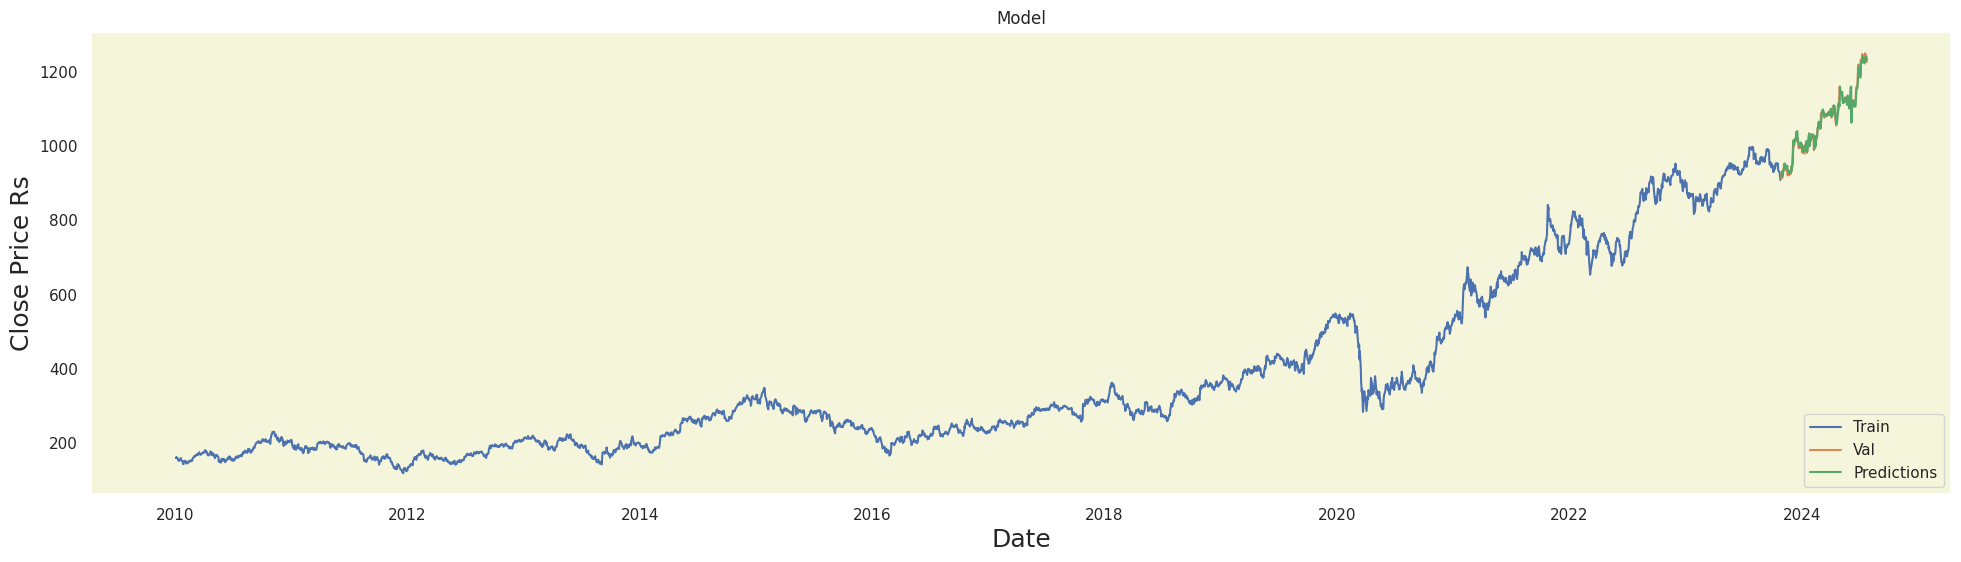

In [121]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [122]:
valid['Error'] = valid['Predictions'] - valid['Close']
valid

Close  Predictions      Error
Date                                           
2023-10-27   912.750000   915.274902   2.524902
2023-10-30   924.900024   920.129578  -4.770447
2023-10-31   915.349976   932.100037  16.750061
2023-11-01   914.049988   920.420776   6.370789
2023-11-02   919.950012   920.624573   0.674561
...                 ...          ...        ...
2024-07-16  1239.900024  1222.836792 -17.063232
2024-07-18  1250.300049  1232.815186 -17.484863
2024-07-19  1248.650024  1241.743896  -6.906128
2024-07-22  1241.150024  1239.145386  -2.004639
2024-07-23  1226.750000  1232.324341   5.574341

[179 rows x 3 columns]

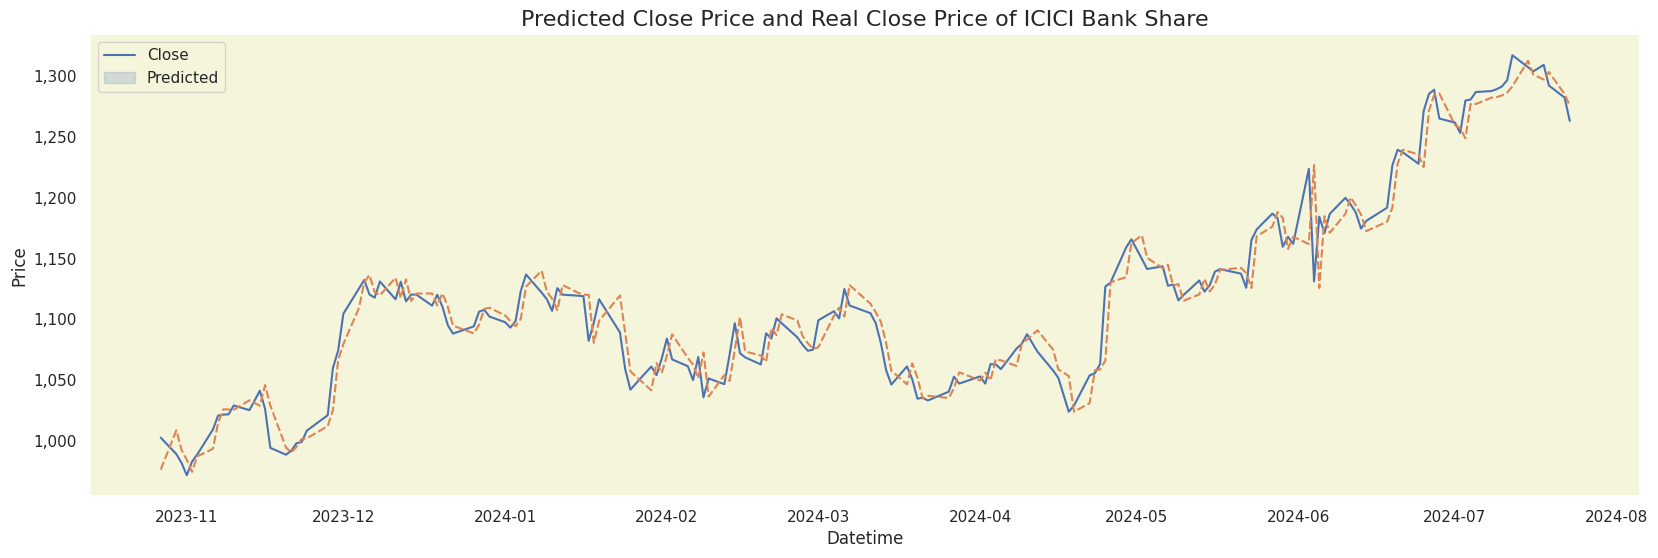

In [182]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

from matplotlib import ticker
fig, ax = plt.subplots()
sns.lineplot(data=valid[['Close', 'Predictions']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend(labels=['Close', 'Predicted'])
plt.title('Predicted Close Price and Real Close Price of ICICI Bank Share', fontsize=16)
plt.show()

# ***AXIS BANK LIMITED***

In [170]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

# Override Yahoo Finance with yfinance
yf.pdr_override()

# Get the stock quote for Adani Power
df = pdr.get_data_yahoo('AXISBANK.NS', start='2010-01-01', end=datetime.now())

# Show the first few rows of the data
df.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  198.779999  199.990005  197.619995  198.419998  180.595230   
2010-01-05  199.600006  204.000000  199.139999  202.559998  184.363327   
2010-01-06  204.000000  205.740005  198.509995  199.160004  181.268753   
2010-01-07  199.289993  201.199997  197.820007  200.570007  182.552124   
2010-01-08  200.600006  203.979996  199.270004  203.190002  184.936707   

             Volume  
Date                 
2010-01-04  4371510  
2010-01-05  7629380  
2010-01-06  5953585  
2010-01-07  4964525  
2010-01-08  7931425

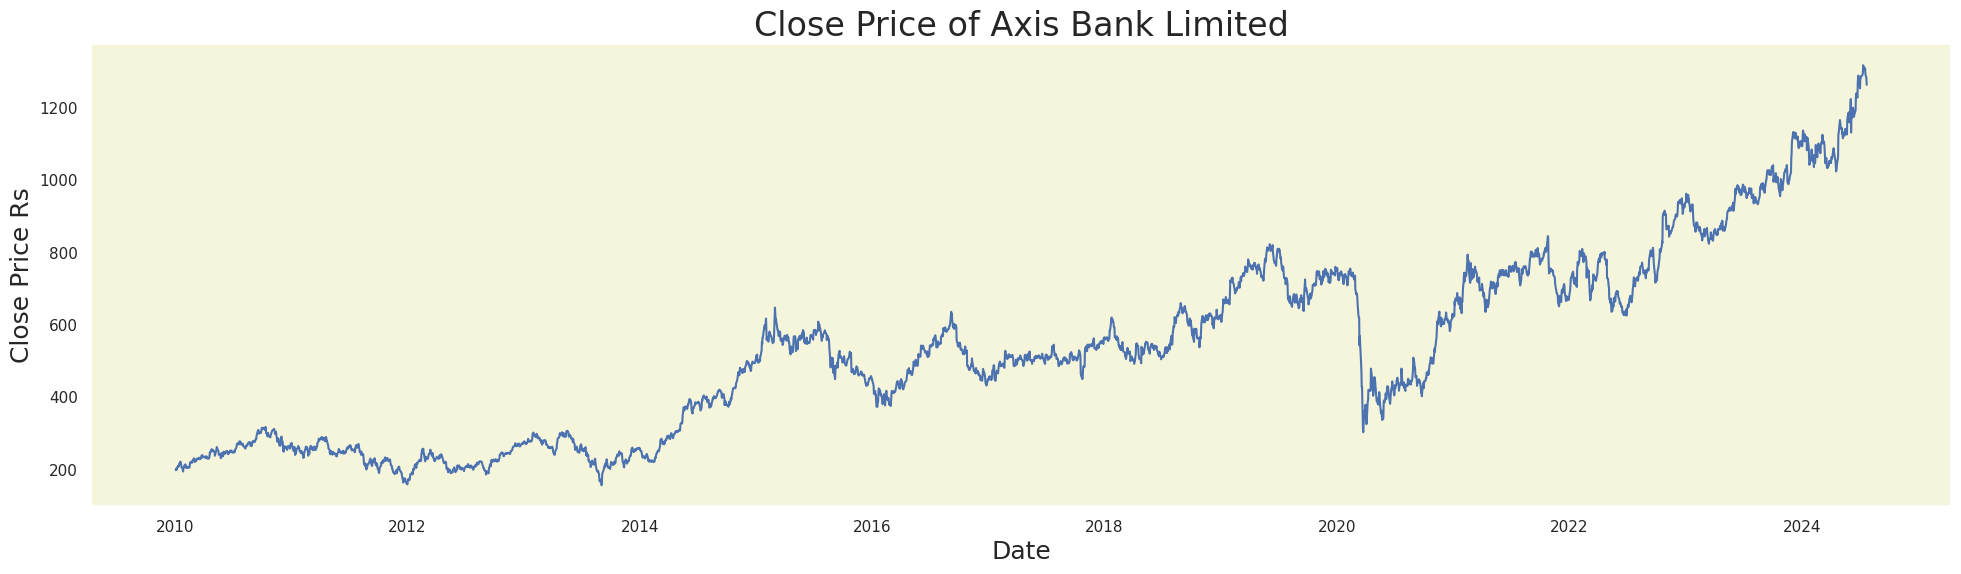

In [172]:
plt.figure(figsize=(24,6))
plt.title('Close Price of Axis Bank Limited',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.show()

In [173]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3411

In [174]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03605489],
       [0.03962161],
       [0.03669242],
       ...,
       [0.97850484],
       [0.97001883],
       [0.95343444]])

In [175]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03605489, 0.03962161, 0.03669242, 0.03790718, 0.04016437,
       0.04592799, 0.04591076, 0.04436   , 0.04880549, 0.05082146,
       0.05596477, 0.05563739, 0.05184667, 0.0479698 , 0.04286957,
       0.04063822, 0.03272078, 0.04065544, 0.04184435, 0.0481938 ,
       0.0438431 , 0.04964978, 0.0457643 , 0.04184435, 0.04132743,
       0.04405848, 0.04166342, 0.04313664, 0.04238711, 0.04192188,
       0.04901226, 0.05438818, 0.05369895, 0.05593032, 0.05432788,
       0.05357834, 0.05400049, 0.05886811, 0.06412343, 0.06307237,
       0.05837705, 0.05522386, 0.05969518, 0.05768782, 0.06007426,
       0.06349452, 0.06344283, 0.06200407, 0.06238314, 0.06312406,
       0.06563971, 0.06429573, 0.06265884, 0.06532095, 0.06408898,
       0.07071411, 0.07169625, 0.06724215, 0.06640647, 0.0673197 ])]
[0.06793137768930677]

[array([0.03605489, 0.03962161, 0.03669242, 0.03790718, 0.04016437,
       0.04592799, 0.04591076, 0.04436   , 0.04880549, 0.05082146,
       0.05596477, 0.05563739, 0.05

In [176]:
import numpy as np
from tensorflow import keras  # Using tensorflow.keras for consistency
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming your data is already preprocessed and scaled (if necessary)

# Define hyperparameters (adjust these based on your data and experiment)
epochs = 100
batch_size = 32
learning_rate = 0.001

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64))  # Remove return_sequences for final LSTM layer
model.add(Dense(25, activation='relu'))  # Add activation layer for hidden layer
model.add(Dense(1))  # Output layer for single prediction

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train the model with validation data to monitor overfitting

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
105/105 [==============================] - 22s 160ms/step - loss: 0.0040
Epoch 2/100
105/105 [==============================] - 19s 178ms/step - loss: 4.2152e-04
Epoch 3/100
105/105 [==============================] - 20s 189ms/step - loss: 3.8210e-04
Epoch 4/100
105/105 [==============================] - 21s 198ms/step - loss: 3.3436e-04
Epoch 5/100
105/105 [==============================] - 13s 123ms/step - loss: 3.2692e-04
Epoch 6/100
105/105 [==============================] - 13s 124ms/step - loss: 3.0021e-04
Epoch 7/100
105/105 [==============================] - 13s 121ms/step - loss: 2.7742e-04
Epoch 8/100
105/105 [==============================] - 13s 121ms/step - loss: 3.3112e-04
Epoch 9/100
105/105 [==============================] - 12s 113ms/step - loss: 2.5457e-04
Epoch 10/100
105/105 [==============================] - 12s 115ms/step - loss: 2.1799e-04
Epoch 11/100
105/105 [==============================] - 13s 123ms/step - loss: 2.0611e-04
Epoch 12/100
105/105 [=

In [177]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 33ms/step


18.06152385927829

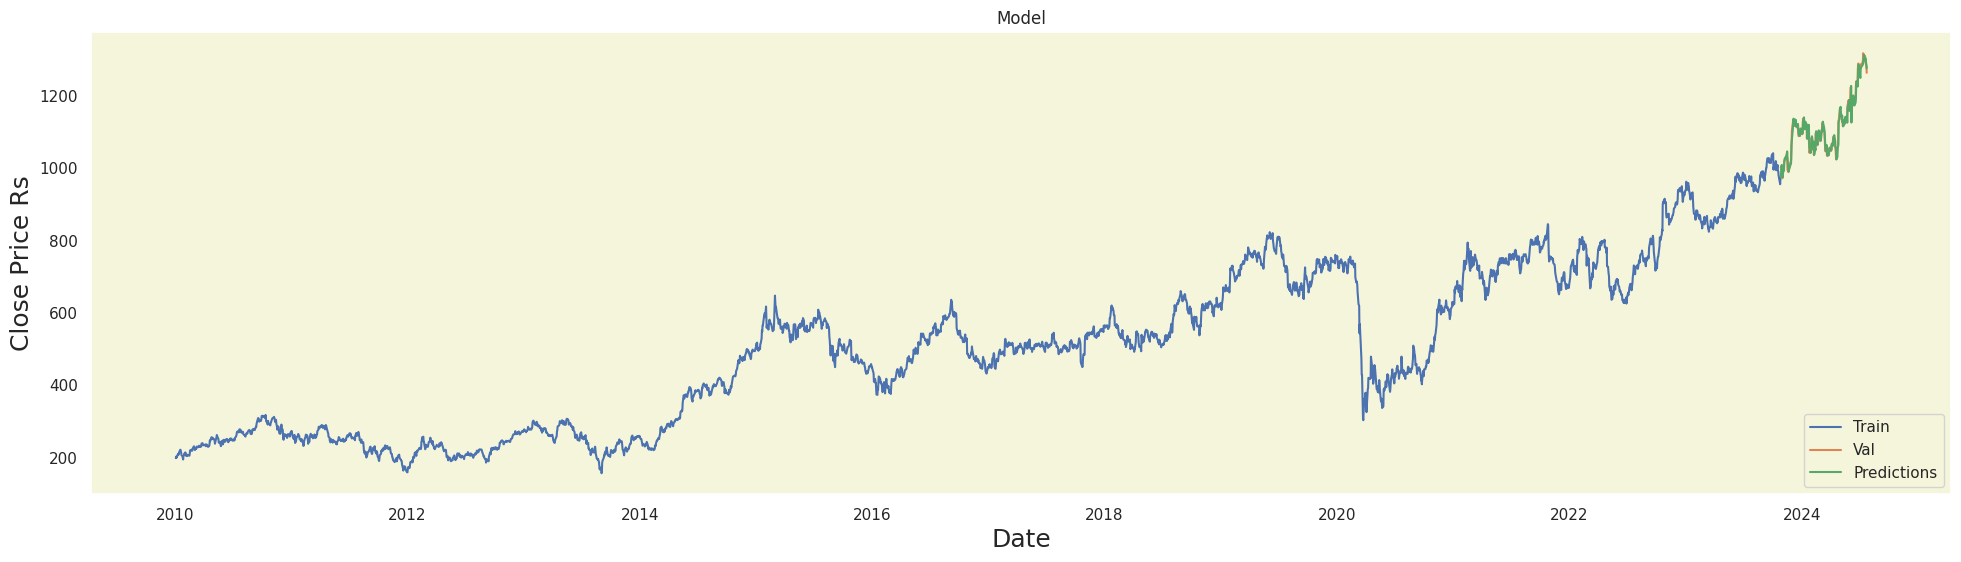

In [178]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [179]:
valid['Error'] = valid['Predictions'] - valid['Close']
valid

Close  Predictions      Error
Date                                           
2023-10-27  1002.750000   976.395630 -26.354370
2023-10-30   989.200012  1008.784424  19.584412
2023-10-31   981.849976   992.623108  10.773132
2023-11-01   971.799988   984.481018  12.681030
2023-11-02   982.950012   974.586914  -8.363098
...                 ...          ...        ...
2024-07-16  1304.000000  1301.429077  -2.570923
2024-07-18  1309.400024  1297.361450 -12.038574
2024-07-19  1292.349976  1303.465454  11.115479
2024-07-22  1282.500000  1285.430542   2.930542
2024-07-23  1263.250000  1275.528931  12.278931

[179 rows x 3 columns]

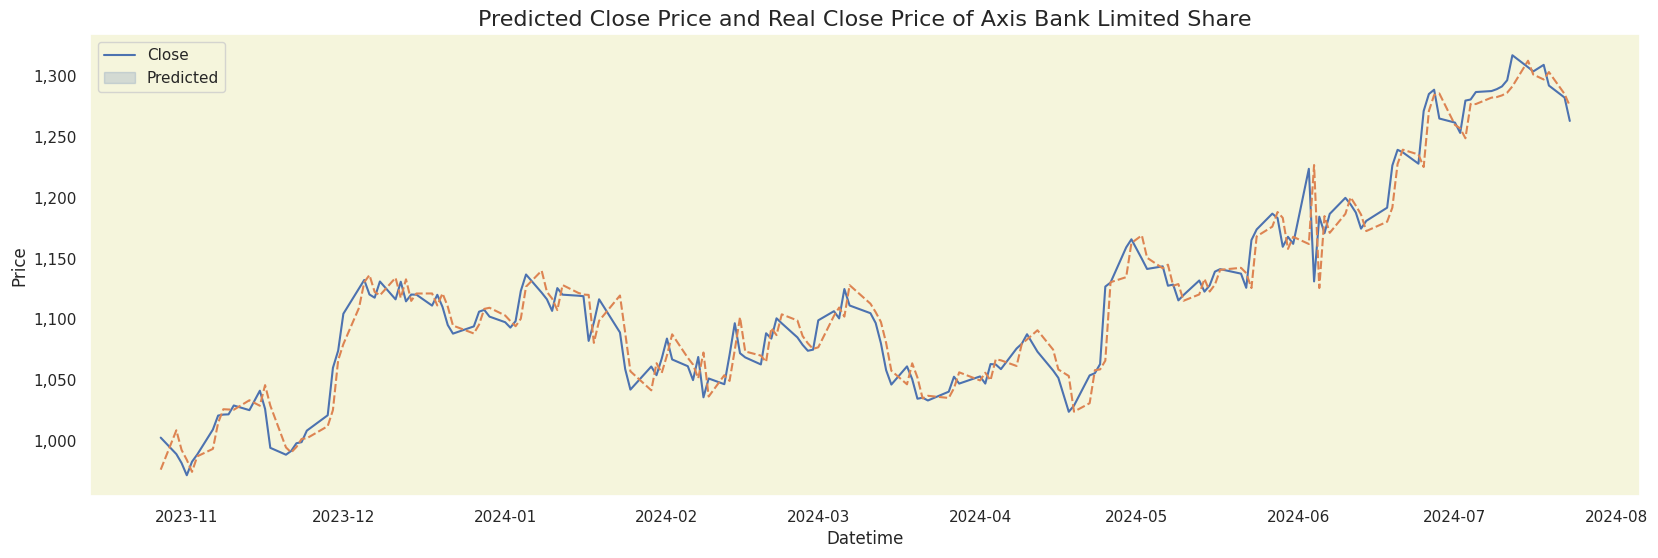

In [181]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

from matplotlib import ticker
fig, ax = plt.subplots()
sns.lineplot(data=valid[['Close', 'Predictions']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend(labels=['Close', 'Predicted'])
plt.title('Predicted Close Price and Real Close Price of Axis Bank Limited Share', fontsize=16)
plt.show()

#***Kotak Mahindra Bank Limited***

In [139]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from datetime import datetime

# Tech Stocks (using NSE and BSE codes)
tech_list = ['HDFCBANK.NS', 'ICICIBANK.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each stock
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start, end)

# Create company list and names
company_list = [stock_data[stock] for stock in tech_list]
Name = ["HDFC Bank Limited", "ICICI Bank Limited", "Axis Bank Limited", "Kotak Mahindra Bank Limited"]

# Add "company_name" column to each stock DataFrame
for company, com_name in zip(company_list, Name):
    company["Name"] = com_name

df = pd.concat(company_list, axis=0)
df = df.reset_index("Date")
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date         Open         High          Low        Close    Adj Close  \
0 2023-07-24  1678.500000  1684.650024  1670.099976  1678.400024  1655.789429   
1 2023-07-25  1684.650024  1699.000000  1678.400024  1696.599976  1673.744263   
2 2023-07-26  1699.599976  1699.599976  1688.000000  1690.699951  1667.923706   
3 2023-07-27  1699.900024  1703.000000  1667.449951  1673.150024  1650.610229   
4 2023-07-28  1661.500000  1668.900024  1641.099976  1643.500000  1621.359619   
5 2023-07-31  1650.050049  1656.800049  1638.699951  1651.199951  1628.955811   
6 2023-08-01  1654.449951  1667.449951  1650.000000  1662.250000  1639.857056   
7 2023-08-02  1642.000000  1651.500000  1633.150024  1640.500000  1618.400024   
8 2023-08-03  1640.000000  1651.349976  1623.000000  1628.650024  1606.709717   
9 2023-08-04  1635.150024  1656.500000  1629.250000  1652.199951  1629.942383   

     Volume               Name  
0  16089722  HDFC Bank Limited  
1  27996298  HDFC Bank Limited  
2  12397179  HDFC Bank Limited  
3  29870651  HDFC Bank Limited  
4  20507842  HDFC Bank Limited  
5  17282503  HDFC Bank Limited  
6  17697094  HDFC Bank Limited  
7  14058161  HDFC Bank Limited  
8  28836973  HDFC Bank Limited  
9  18694152  HDFC Bank Limited

In [140]:
def load_data(company, start, end):

    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Name == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    return dataframe

In [141]:
import datetime as dt

COMPANY = 'Kotak Mahindra Bank Limited'
START_DATE = dt.datetime(2015,1,1)
END_DATE = dt.datetime(2024,1,1)

START_DATE_TEST = END_DATE

In [142]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

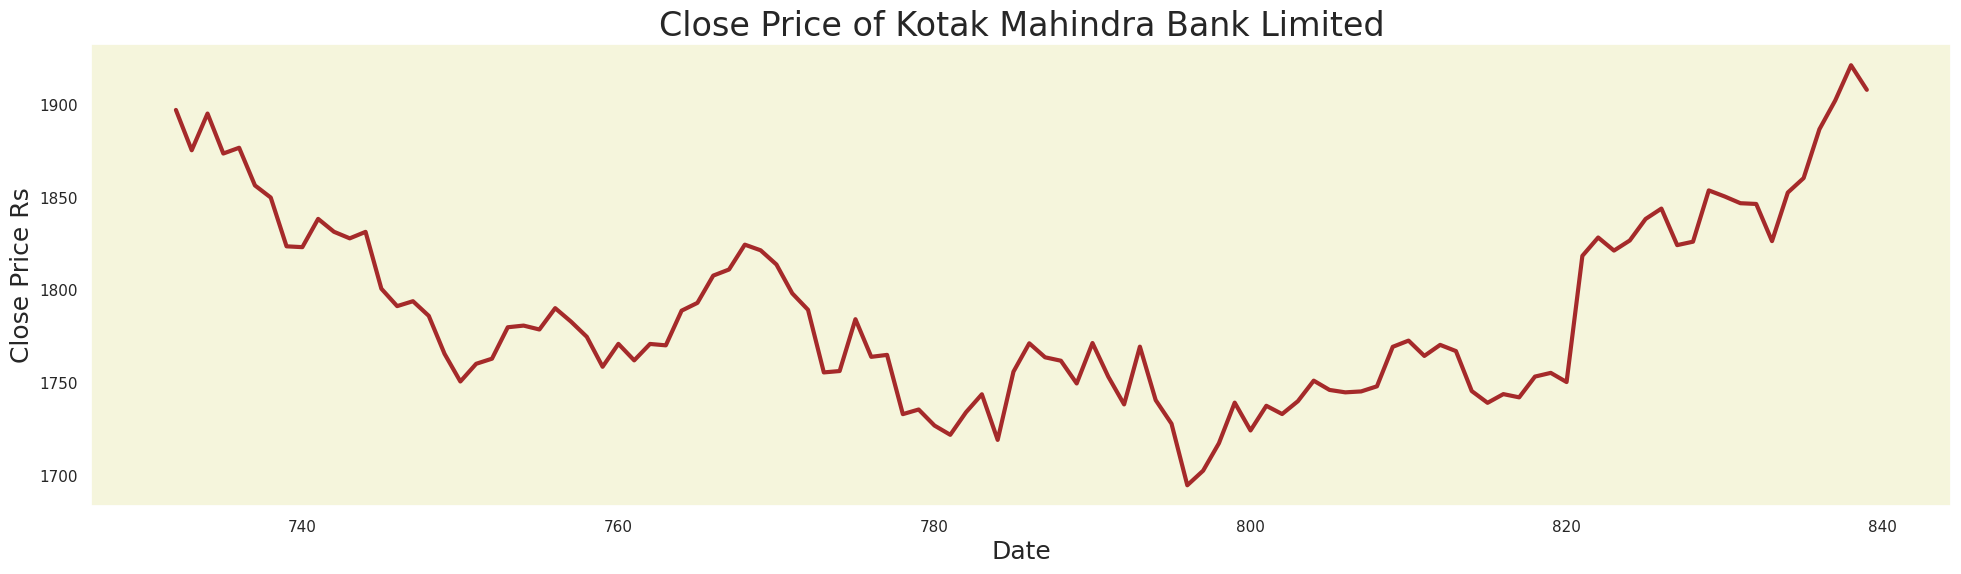

In [154]:
plt.figure(figsize=(24,6))
plt.title('Close Price of Kotak Mahindra Bank Limited',fontsize=24)
plt.plot(data['Close'],lw=3,color='Brown')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs', fontsize=18)
plt.show()

In [144]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [145]:
# Set the number of days used for prediction
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [146]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [147]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [148]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.keras',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size = 16,
    callbacks = [checkpointer]
)

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 0.2257

3/3 [==============================] - 5s 58ms/step - loss: 0.2257
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 0.1137

3/3 [==============================] - 0s 62ms/step - loss: 0.1137
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.0471

3/3 [==============================] - 0s 64ms/step - loss: 0.0471
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 0.0594

3/3 [==============================] - 0s 79ms/step - loss: 0.0594
Epoch 5/50
3/3 [==============================] - ETA: 0s - loss: 0.0382

3/3 [==============================] - 0s 72ms/step - loss: 0.0382
Epoch 6/50
3/3 [==============================] - ETA: 0s - loss: 0.0369

3/3 [==============================] - 0s 60ms/step - loss: 0.0369
Epoch 7/50
3/3 [==============================] - ETA: 0s - loss: 0.0354

3/3 [==============================] - 0s 63ms/step - loss: 0.0354
Epoch 8/50
3/3 [==============================] - ETA: 0s - loss: 0.0350

3/3 [==============================] - 0s 62ms/step - loss: 0.0350
Epoch 9/50
3/3 [==============================] - ETA: 0s - loss: 0.0227

3/3 [==============================] - 0s 70ms/step - loss: 0.0227
Epoch 10/50
3/3 [==============================] - ETA: 0s - loss: 0.0239

3/3 [==============================] - 0s 73ms/step - loss: 0.0239
Epoch 11/50
3/3 [==============================] - ETA: 0s - loss: 0.0211

3/3 [==============================] - 0s 62ms/step - loss: 0.0211
Epoch 12/50
3/3 [==============================] - ETA: 0s - loss: 0.0218

3/3 [==============================] - 0s 65ms/step - loss: 0.0218
Epoch 13/50
3/3 [==============================] - ETA: 0s - loss: 0.0150

3/3 [==============================] - 0s 62ms/step - loss: 0.0150
Epoch 14/50
3/3 [==============================] - ETA: 0s - loss: 0.0194

3/3 [==============================] - 0s 64ms/step - loss: 0.0194
Epoch 15/50
3/3 [==============================] - ETA: 0s - loss: 0.0210

3/3 [==============================] - 0s 77ms/step - loss: 0.0210
Epoch 16/50
3/3 [==============================] - ETA: 0s - loss: 0.0176

3/3 [==============================] - 0s 59ms/step - loss: 0.0176
Epoch 17/50
3/3 [==============================] - ETA: 0s - loss: 0.0166

3/3 [==============================] - 0s 80ms/step - loss: 0.0166
Epoch 18/50
3/3 [==============================] - ETA: 0s - loss: 0.0151

3/3 [==============================] - 0s 62ms/step - loss: 0.0151
Epoch 19/50
3/3 [==============================] - ETA: 0s - loss: 0.0145

3/3 [==============================] - 0s 71ms/step - loss: 0.0145
Epoch 20/50
3/3 [==============================] - ETA: 0s - loss: 0.0155

3/3 [==============================] - 0s 99ms/step - loss: 0.0155
Epoch 21/50
3/3 [==============================] - ETA: 0s - loss: 0.0162

3/3 [==============================] - 0s 98ms/step - loss: 0.0162
Epoch 22/50
3/3 [==============================] - ETA: 0s - loss: 0.0146

3/3 [==============================] - 0s 110ms/step - loss: 0.0146
Epoch 23/50
3/3 [==============================] - ETA: 0s - loss: 0.0168

3/3 [==============================] - 0s 100ms/step - loss: 0.0168
Epoch 24/50
3/3 [==============================] - ETA: 0s - loss: 0.0137

3/3 [==============================] - 0s 92ms/step - loss: 0.0137
Epoch 25/50
3/3 [==============================] - ETA: 0s - loss: 0.0142

3/3 [==============================] - 0s 97ms/step - loss: 0.0142
Epoch 26/50
3/3 [==============================] - ETA: 0s - loss: 0.0177

3/3 [==============================] - 0s 117ms/step - loss: 0.0177
Epoch 27/50
3/3 [==============================] - ETA: 0s - loss: 0.0141

3/3 [==============================] - 0s 90ms/step - loss: 0.0141
Epoch 28/50
3/3 [==============================] - ETA: 0s - loss: 0.0158

3/3 [==============================] - 0s 97ms/step - loss: 0.0158
Epoch 29/50
3/3 [==============================] - ETA: 0s - loss: 0.0140

3/3 [==============================] - 0s 112ms/step - loss: 0.0140
Epoch 30/50
3/3 [==============================] - ETA: 0s - loss: 0.0151

3/3 [==============================] - 0s 100ms/step - loss: 0.0151
Epoch 31/50
3/3 [==============================] - ETA: 0s - loss: 0.0126

3/3 [==============================] - 0s 95ms/step - loss: 0.0126
Epoch 32/50
3/3 [==============================] - ETA: 0s - loss: 0.0115

3/3 [==============================] - 0s 96ms/step - loss: 0.0115
Epoch 33/50
3/3 [==============================] - ETA: 0s - loss: 0.0115

3/3 [==============================] - 0s 96ms/step - loss: 0.0115
Epoch 34/50
3/3 [==============================] - ETA: 0s - loss: 0.0143

3/3 [==============================] - 0s 70ms/step - loss: 0.0143
Epoch 35/50
3/3 [==============================] - ETA: 0s - loss: 0.0123

3/3 [==============================] - 0s 61ms/step - loss: 0.0123
Epoch 36/50
3/3 [==============================] - ETA: 0s - loss: 0.0119

3/3 [==============================] - 0s 63ms/step - loss: 0.0119
Epoch 37/50
3/3 [==============================] - ETA: 0s - loss: 0.0155

3/3 [==============================] - 0s 75ms/step - loss: 0.0155
Epoch 38/50
3/3 [==============================] - ETA: 0s - loss: 0.0122

3/3 [==============================] - 0s 65ms/step - loss: 0.0122
Epoch 39/50
3/3 [==============================] - ETA: 0s - loss: 0.0125

3/3 [==============================] - 0s 64ms/step - loss: 0.0125
Epoch 40/50
3/3 [==============================] - ETA: 0s - loss: 0.0139

3/3 [==============================] - 0s 66ms/step - loss: 0.0139
Epoch 41/50
3/3 [==============================] - ETA: 0s - loss: 0.0126

3/3 [==============================] - 0s 64ms/step - loss: 0.0126
Epoch 42/50
3/3 [==============================] - ETA: 0s - loss: 0.0131

3/3 [==============================] - 0s 84ms/step - loss: 0.0131
Epoch 43/50
3/3 [==============================] - ETA: 0s - loss: 0.0123

3/3 [==============================] - 0s 61ms/step - loss: 0.0123
Epoch 44/50
3/3 [==============================] - ETA: 0s - loss: 0.0130

3/3 [==============================] - 0s 60ms/step - loss: 0.0130
Epoch 45/50
3/3 [==============================] - ETA: 0s - loss: 0.0106

3/3 [==============================] - 0s 68ms/step - loss: 0.0106
Epoch 46/50
3/3 [==============================] - ETA: 0s - loss: 0.0127

3/3 [==============================] - 0s 65ms/step - loss: 0.0127
Epoch 47/50
3/3 [==============================] - ETA: 0s - loss: 0.0097

3/3 [==============================] - 0s 74ms/step - loss: 0.0097
Epoch 48/50
3/3 [==============================] - ETA: 0s - loss: 0.0104

3/3 [==============================] - 0s 62ms/step - loss: 0.0104
Epoch 49/50
3/3 [==============================] - ETA: 0s - loss: 0.0132

3/3 [==============================] - 0s 68ms/step - loss: 0.0132
Epoch 50/50
3/3 [==============================] - ETA: 0s - loss: 0.0116

3/3 [==============================] - 0s 61ms/step - loss: 0.0116


In [149]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [150]:
# Load test data for the specified company and date range
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,
    end=dt.datetime.now()
)

# Extract the actual closing prices from the test data
actual_prices = test_data['Close'].values

# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)

In [151]:
# Initialize an empty list for test data input
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

# Convert the x_test list to a numpy array
x_test = np.array(x_test)

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

5/5 [==============================] - 1s 23ms/step


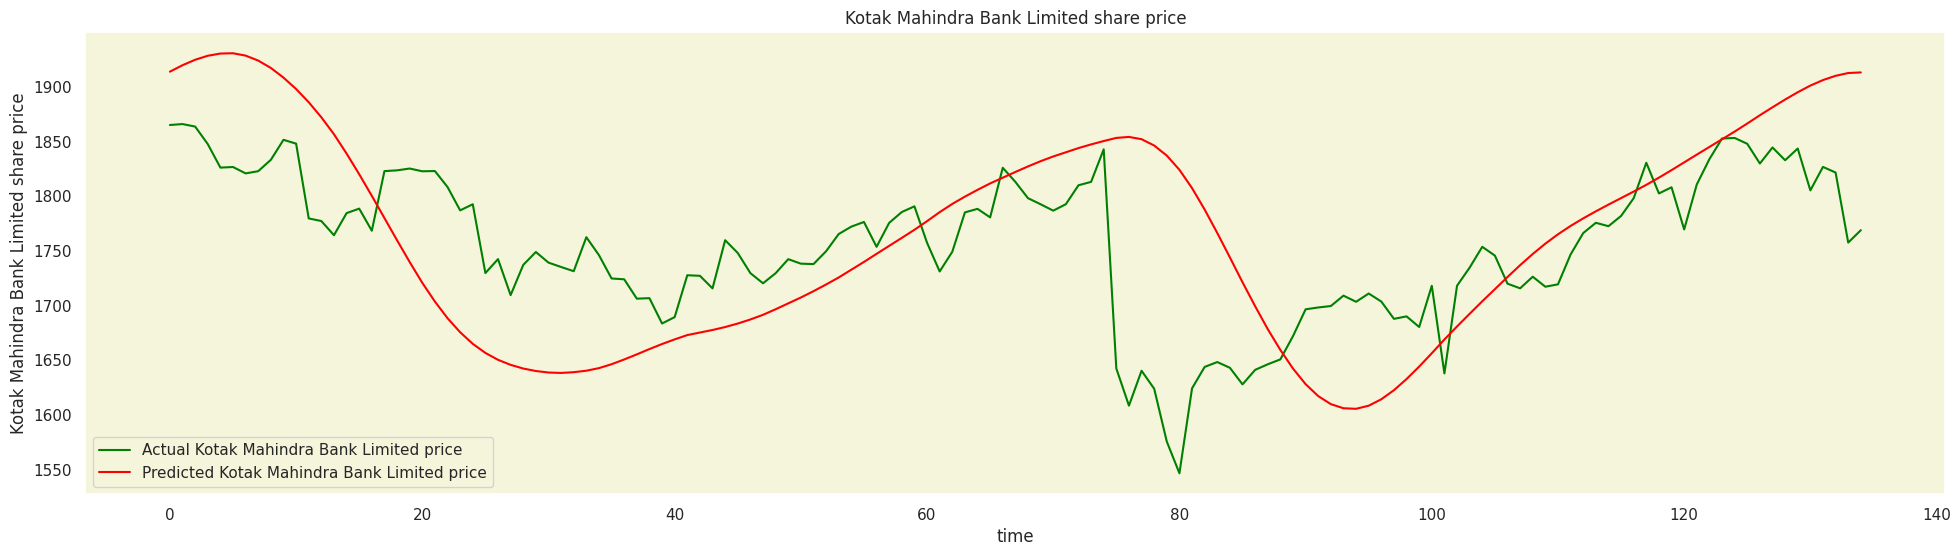

In [152]:
from pylab import rcParams
rcParams['figure.figsize'] = 24, 6

# Plot the actual prices using a black line
plt.plot(actual_prices, color='Green', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(predicted_prices, color='Red', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title(f"{COMPANY} share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()

In [153]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 1s/step
Prediction: 1911.6065673828125
